# Анализ игровой индустрии

<font size="4"><b>О проекте:</b></font>

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). **Нужно выявить определяющие успешность игры закономерности**. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В проекте используются **данные до 2016 года**. Представим, что сейчас декабрь 2016 г., планируется кампания на 2017-й. *Нужно отработать принцип работы с данными.* Неважно, прогнозируются ли продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

<font size="4"><b>Описание данных:</b></font>

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация-о-датасете" data-toc-modified-id="Общая-информация-о-датасете-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация о датасете</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Приведение-имен-столбцов-к-необходимому-стилю" data-toc-modified-id="Приведение-имен-столбцов-к-необходимому-стилю-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Приведение имен столбцов к необходимому стилю</a></span></li><li><span><a href="#Преобразование-типов-столбцов" data-toc-modified-id="Преобразование-типов-столбцов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Преобразование типов столбцов</a></span></li><li><span><a href="#Поиск-дубликатов" data-toc-modified-id="Поиск-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Поиск дубликатов</a></span><ul class="toc-item"><li><span><a href="#Явные-дубликаты" data-toc-modified-id="Явные-дубликаты-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Явные дубликаты</a></span></li><li><span><a href="#Неявные-дубликаты" data-toc-modified-id="Неявные-дубликаты-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Неявные дубликаты</a></span></li></ul></li><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Работа с пропусками</a></span><ul class="toc-item"><li><span><a href="#Пропуски-в-столбцах-critic_score-и-rating" data-toc-modified-id="Пропуски-в-столбцах-critic_score-и-rating-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Пропуски в столбцах <code>critic_score</code> и <code>rating</code></a></span></li><li><span><a href="#Пропуски-в-столбце-year_of_release" data-toc-modified-id="Пропуски-в-столбце-year_of_release-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Пропуски в столбце <code>year_of_release</code></a></span></li><li><span><a href="#Пропуски-в-столбцах-genre-и-name" data-toc-modified-id="Пропуски-в-столбцах-genre-и-name-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Пропуски в столбцах <code>genre</code> и <code>name</code></a></span></li></ul></li><li><span><a href="#Очистка-от-аномалий" data-toc-modified-id="Очистка-от-аномалий-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Очистка от аномалий</a></span></li><li><span><a href="#Подсчет-суммарных-продаж" data-toc-modified-id="Подсчет-суммарных-продаж-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Подсчет суммарных продаж</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Продажи-по-годам" data-toc-modified-id="Продажи-по-годам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Продажи по годам</a></span></li><li><span><a href="#Продажи-по-платформам" data-toc-modified-id="Продажи-по-платформам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Продажи по платформам</a></span><ul class="toc-item"><li><span><a href="#Изменение-количества-выпускаемых-игр-и-продаж-для-каждой-платформы-с-течением-времени" data-toc-modified-id="Изменение-количества-выпускаемых-игр-и-продаж-для-каждой-платформы-с-течением-времени-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Изменение количества выпускаемых игр и продаж для каждой платформы с течением времени</a></span></li><li><span><a href="#Характерное-время-жизни-платформ" data-toc-modified-id="Характерное-время-жизни-платформ-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Характерное время жизни платформ</a></span></li><li><span><a href="#Актуальная-динамика" data-toc-modified-id="Актуальная-динамика-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Актуальная динамика</a></span></li><li><span><a href="#Разброс-по-продажам" data-toc-modified-id="Разброс-по-продажам-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Разброс по продажам</a></span></li><li><span><a href="#Влияние-на-продажи-отзывов" data-toc-modified-id="Влияние-на-продажи-отзывов-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Влияние на продажи отзывов</a></span></li><li><span><a href="#Распределение-игр-по-жанрам" data-toc-modified-id="Распределение-игр-по-жанрам-3.2.6"><span class="toc-item-num">3.2.6&nbsp;&nbsp;</span>Распределение игр по жанрам</a></span></li></ul></li></ul></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span><ul class="toc-item"><li><span><a href="#Самые-популярные-платформы" data-toc-modified-id="Самые-популярные-платформы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Самые популярные платформы</a></span></li><li><span><a href="#Самые-популярные-жанры" data-toc-modified-id="Самые-популярные-жанры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Самые популярные жанры</a></span></li><li><span><a href="#Влияние-рейтинга-ESRB" data-toc-modified-id="Влияние-рейтинга-ESRB-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Влияние рейтинга ESRB</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Сравнение-среднего-рейтинга-платформ-Xbox-One-и-PC" data-toc-modified-id="Сравнение-среднего-рейтинга-платформ-Xbox-One-и-PC-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Сравнение среднего рейтинга платформ Xbox One и PC</a></span></li><li><span><a href="#Сравнение-средних-пользовательских-рейтингов-жанров-Action-и-Sports" data-toc-modified-id="Сравнение-средних-пользовательских-рейтингов-жанров-Action-и-Sports-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Сравнение средних пользовательских рейтингов жанров Action и Sports</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Общая информация о датасете

In [229]:
# импортируем все необходимые библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

In [230]:
# загрузка данных

try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [231]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<font size="3">Каждая строка - набор данных об одной игре.</font>

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<p> <font size="3">Всего в датасете представлена информация о\( \) <b>16 715</b> играх, однако, возможно, присутствуют строки-дупликаты и истинное количество игр в датасете меньше. В <b>6</b> столбцах присутствуют пропуски.</font> </p>

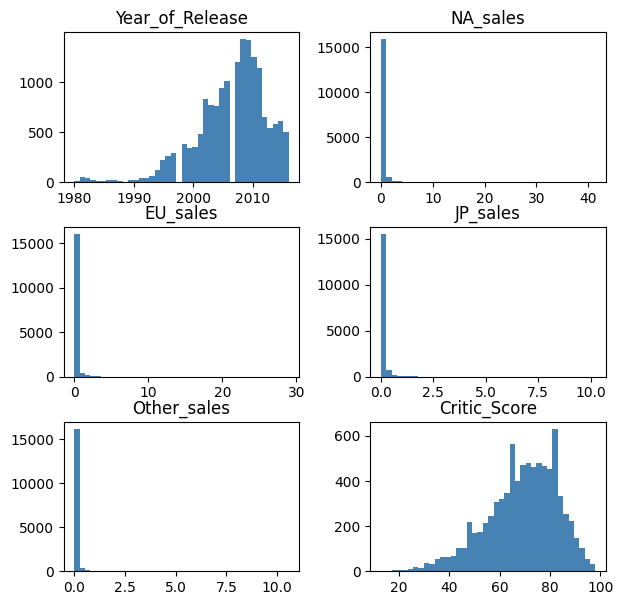

In [233]:
data.hist(figsize=(7, 7), color='SteelBlue', grid=False, bins=40);

<font size="3">В датасете представлена информация об играх с <b>1980-го</b> года.

В распределении по годам встречаются провалы: возможно, это связано с отсутствием информации об играх в отдельные годы, но также это может быть вызвано исключительно параметрами построения гистограммы. Предположить причину этого пока невозможно.
    
Продажи сосредоточены в узком диапазоне, но имеют длинный хвост больших и крайне редких значений. Вероятно, редкие значения - это продажи особо удачных игр, чей успех сильно выделяется на фоне остальных.

Распределение оценки критиков близко к нормальному, но присутствуют 3 отдельных выбивающихся пика. Не было построено распределение пользовательских оценок: этот столбец определён как <i>object</i>, а должен быть численный тип. Исправим это позднее.</font>

<font size="3">Посмотрим в целом на долю пропусков для каждого параметра в отдельности:</font>

In [234]:
# посмотрим долю пропущенных значений в столбцах
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)              # даёт долю пропущенных значений от всего датасета
            .to_frame()                         # чтобы работать как с DataFrame
            .rename(columns = {0:'ratio'})
            .query('ratio > 0')                 # рассмотрим только столбцы с пропущенными значениями
            .sort_values(by = 'ratio', ascending = True)
            .plot(kind = 'barh', figsize = (7,5), legend = False, fontsize = 16, color='SteelBlue')
            .set_title('Доля пропусков в столбцах' + "\n", fontsize = 17, color = 'Black')    
        );    
    except:
        print('Пропусков не осталось или произошла ошибка в первой части функции')

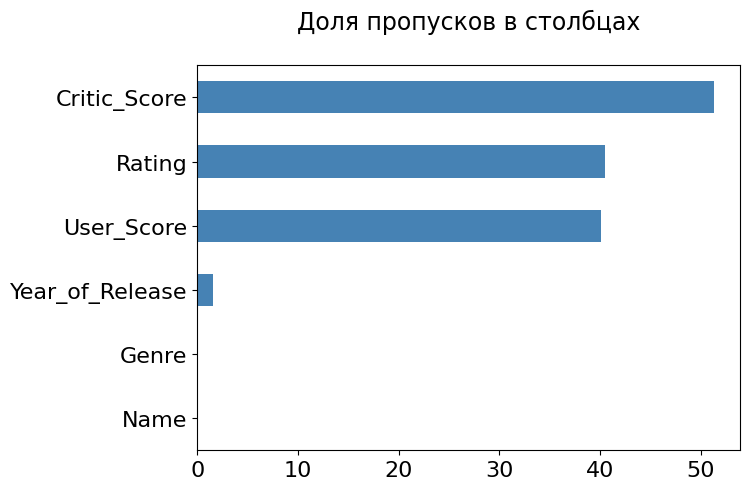

In [235]:
pass_value_barh(data)

<p> <font size="3">В <b>3-х</b> столбцах наблюдается крайне высокое количество пропусков, превышающее <b>40%</b>. Эти пропуски связаны с оценкой игр. Так как в датасете представлены данные с 1980 по 2016 годы, то, возможно, эти пропуски связаны именно с играми, выпущенными довольно давно, когда игровая индустрия только зарождалась и ещё не была развита культура оценивания пользователями и, тем более, критиками. </font> </p>

## Предобработка данных

### Приведение имен столбцов к необходимому стилю

Для этого достаточно имена привести к нижнему регистру:

In [236]:
data.columns = data.columns.str.lower()

In [237]:
# проверим успешность замены
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование типов столбцов

<p> <font size="3">
    
Год выпуска - целое число, поэтому имеет смысл изменить тип столбца `year_of_release` на <i>int</i>. Однако наличие пропусков в столбце не позволяет произвести замену. Пропуски будут обрабатываться следующим шагом и, если получится заполнить весь столбец - заменим тип, в противном случае оставим *float*.

Столбец `user_score` должен относится к типу *float*. Посмотрим, какие значения содержатся в этом столбце:

In [238]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце присутствуют значения **'tbd'**, из-за которых тип столбца и относится к строковому. Эта аббревиатура с английского расшифровывается как *To Be Determined* или как *To Be Decided*. За этим могут скрываться как отсутствующие значения (игра по какой-либо причине не получала ещё оценок), так и "скрытые", например, если оценок ещё слишком мало, чтобы присваивать ей рейтинг.
    
Так или иначе, эта аббревиатура равнозначна отсутствию рейтинга. Однако удостоверимся, что нет никаких существенных отличий между играми, в которых рейтинг просто упущен, и играми, в которых рейтинг указан как *tbd*.

In [239]:
print('Количество строк-пропусков:', data[data['user_score'].isna()]['platform'].count())
data[data['user_score'].isna()].head(10)

Количество строк-пропусков: 6701


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [240]:
print('Количество строк с оценкой пользователей "tbd":', data[data['user_score'] == 'tbd']['platform'].count())
data[data['user_score'] == 'tbd'].head(10)

Количество строк с оценкой пользователей "tbd": 2424


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


Первое, что бросается в глаза в первых 10 строках срезов - отсутствие каких-либо рейтингов в первой таблице. Можно также обратить внимание на отличие платформ, на которых выходила игра. Проверим наличие этих зависимостей для всего среза.

In [241]:
# создадим функцию для подсчета доли среза данных относительно другого среза данных

def condition_ratio_data(df, cond1, cond2, col1, col2=0):
    try:
        # добавим условие, что если имя второго столбца не задано, то берём имя первого столбца и во втором случае
        if col2 == 0:
            col2 = col1
        return df.loc[cond1, col1].count() / df.loc[cond2, col2].count()
    except:
        print('Ошибка')

In [242]:
# перевод доли в проценты
def ratio_into_percent(ratio, n=0):
    try:
        if n == 0:
            return f"{int(round(ratio*100))}%"
        else:
            return f"{round(ratio * 100, n)}%"
    except:
        print('Ошибка')

In [243]:
print('Доля строк первого среза, в которых известен хотя бы один из оставшихся рейтинговых параметров:',
     ratio_into_percent(
         condition_ratio_data(
             data,
             (data['user_score'].isna()) & (~(data['rating'].isna()) | ~(data['critic_score'].isna())),
             data['user_score'].isna(), 'platform', 'platform'), 2))

Доля строк первого среза, в которых известен хотя бы один из оставшихся рейтинговых параметров: 1.19%


In [244]:
print('Доля строк второго среза, в которых не известен ни один из оставшихся рейтинговых параметров:',
     ratio_into_percent(condition_ratio_data(data, 
                              (data['user_score'] == 'tbd') & ((data['rating'].isna()) & (data['critic_score'].isna())), 
                              data['user_score'] == 'tbd', 'platform', 'platform'), 2))

Доля строк второго среза, в которых не известен ни один из оставшихся рейтинговых параметров: 1.9%


In [245]:
data[data['user_score'].isna()]['platform'].unique()

array(['NES', 'GB', 'DS', 'SNES', 'GBA', 'PS4', '3DS', 'N64', 'X360',
       'Wii', '2600', 'PS', 'XOne', 'GC', 'PS3', 'GEN', 'PC', 'PSP',
       'WiiU', 'PS2', 'XB', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [246]:
data[data['user_score'] == 'tbd']['platform'].unique()

array(['Wii', 'PS2', 'GBA', 'PC', 'DS', 'PS', 'XB', 'X360', 'PS3', 'GC',
       'PSP', '3DS', 'WiiU', 'XOne', 'PSV', 'PS4'], dtype=object)

Никаких особенностей, связанных с платформами, не подтвердилось. А предположение про группировку пропусков в рейтинговых столбцах - в целом, наоборот. Проверим годы выпуска этих игр.

In [247]:
(
    data
    .loc[(data['user_score'].isna()) & (data['critic_score'].isna()) & (data['rating'].isna()), 'year_of_release']
    .sort_values()
    .unique()
)

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

В датасете за каждый год есть такие строки. 

In [248]:
print('Доля игр с отсутствием рейтинговых параметров:',
     ratio_into_percent(
         condition_ratio_data(
             data,
             (data['user_score'].isna()) & (data['critic_score'].isna()) & (data['rating'].isna()),
             data.index,
             'platform', 'platform'),
         2))

Доля игр с отсутствием рейтинговых параметров: 39.61%


***В целом, практически 40% игр в датасете без какого-либо рейтинга.*** 

Разницы в играх с пустым значением `critic_score` и со значением *'tbd'* не обнаружено, так что **заменим оба значения на -1**, чтобы впоследствии изменить тип столбца на *float*.

In [249]:
data.loc[data['user_score'].isna(), 'user_score'] = -1
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1

In [250]:
# проверим успешность замены
print('Количество строк-пропусков:', data[data['user_score'].isna()]['platform'].count())
print('Количество строк с оценкой пользователей "tbd":', data[data['user_score'] == 'tbd']['platform'].count())

Количество строк-пропусков: 0
Количество строк с оценкой пользователей "tbd": 0


In [251]:
# заменим тип
data['user_score'] = data['user_score'].astype('float')

In [252]:
data['user_score'].dtype

dtype('float64')

### Поиск дубликатов

#### Явные дубликаты

In [253]:
print('Всего полных дубликатов:', data[data.duplicated()]['platform'].count())

Всего полных дубликатов: 0


Явных дубликатов в датасете нет.

#### Неявные дубликаты

In [254]:
print('Количество возможных дубликатов:', data[data['name'].duplicated()]['platform'].count())
data[data['name'].duplicated()].head(5)

Количество возможных дубликатов: 5155


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M


Если искать дубликаты по названию игр, то мы имеем более 5 тыс. возможных дублированных строк. Однако такие строки могут быть как разными играми с одинаковыми названиями, так и информацией об одной и той же игре, но для разных платформ. Попробуем найти дубликаты именно для случая совпадений внутри набора параметров: имени, даты выхода, платформы и жанра.

In [255]:
# функция возвращает индексы дубликатов имён внутри одной платформы в определенный год выхода

def search_dupl(data):
    i = []
    for platform in data['platform'].unique():
        for year in data['year_of_release'].unique():
            df = data[(data['platform'] == platform) & (data['year_of_release'] == year)]
            i.extend(df[df['name'].str.replace(' ', '').str.lower().duplicated()].index)
            
    return i   

In [256]:
data.loc[search_dupl(data)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,-1.0,NaN


Вторая строка - это игра без имени. Сразу удалим эту игру.

In [257]:
data = data[data.index != 14244]

In [258]:
# посмотрим на все игры с именем первой строчки таблицы дубликатов
data[data['name'].str.replace(' ', '').str.lower() == data.loc[16230, 'name'].replace(' ', '').lower()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Здесь попадаются 2 совпадающие по названию, платформе и году выпуска строки.

In [259]:
# для наглядности выведем только эти две строчки
data.loc[[604, 16230]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


А эти строчки уже похожи на дубликаты. Разница в данном случае в значениях продаж. Скорее всего, в подсчете продаж второй строки произошла ошибка. **Эту строку удалим.**

In [260]:
data = data[data.index != 16230]

Предыдущее рассмотрение не учитывало возможные пропуски. Кроме того, возможны дублирования с ошибками (например, дважды указана игра, но в одной из строк неверный год выхода).

In [261]:
# поищем совпадение платформы и жанра, чтобы учесть возможные пропуски или ошибки в годе выпуска
# функция возвращает датафрейм дубликатов

def dupl_func(data):
    dupl_data = pd.DataFrame()
    
    for platform in data['platform'].unique():
        for genre in data['genre'].unique():
                
            i = (data
                 .loc[(data['platform'] == platform) & (data['genre'] == genre), 'name']
                 .duplicated()
                 .to_frame()
                 .query('name == True')
                 .index)
            
            dupl_data = dupl_data.append(data.loc[i])
    
    return dupl_data

In [262]:
dupl_func(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T


Изучем выведенные дубликаты.

In [263]:
# создадим функцию, чтобы вывести информацию о похожих строчках на основе
# выбранного индекса из таблицы дубликатов

def dupl_str(data, ind):
    return data[(data['name'] == data.loc[ind, 'name']) & (data['platform'] == data.loc[ind, 'platform'])]

In [264]:
dupl_str(data, 1591)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T


Видим, что у этих игр разный год выпуска. Можно было бы предположить, что в одной из строк опечатка, но на самом деле в 2012 году вышел так называемый ремейк старой игры. То есть это не является дубликатом. Скорее всего, аналогично для этой же игры, но на другой платформе.

In [265]:
dupl_str(data, 11715)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.0,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.0,0.02,82.0,8.5,T


Здесь строки тоже не являются дубликатами.

In [266]:
dupl_str(data, 4127)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


В данном случае в одной из строк упущен год выпуска. Здесь уже неодназначно на счет продаж: в первой строке довольно малое значение продаж в Европе, когда как во второй строке - наоборот. Несмотря на то, что число 0.48 выглядит более правдоподобно, не будем изменять первую строку, оставим её, а вторую - удалим.

In [267]:
data = data[data.index != 4127]

Таким образом, датасет по возможности очищен от дубликатов. Для проверки вручную всех имён и строк этот датасет слишком велик.

### Работа с пропусками

Пропуски в столбце `user_score` были заменены на *-1* ранее, при замене типа этого столбца.

#### Пропуски в столбцах `critic_score` и `rating`

По аналогии с заменой в `user_score`, **пропуски заменим на -1**:

In [268]:
for col in ['critic_score', 'rating']:
    data[col].fillna(-1, inplace=True)

In [269]:
# проверим успешность замены
print('Количество пропусков `critic_score`:', data[data['critic_score'].isna()]['platform'].count())
print('Количество пропусков `rating`:', data[data['rating'].isna()]['platform'].count())

Количество пропусков `critic_score`: 0
Количество пропусков `rating`: 0


#### Пропуски в столбце `year_of_release`

In [270]:
data[data['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,-1.0,-1.0,-1
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,-1.0,-1.0,-1


Вручную заполнять года выхода всех игр не будем, однако попробуем найти год выхода в названии игр.

In [271]:
# создадим функцию, которая будет возвращать индексы тех игр, где в названии встречается упоминание года
def year_in_name(data):
    a = []
    for year in data['year_of_release'].dropna().unique():
        for name in data['name'].dropna().unique():
            if str(int(year)) in name:
                a.extend(data[data['name'] == name].index)
    return a            

In [272]:
# выведем строки с именами, где упоминается год, но отсутствуют данные в столбце `year_of_release`
data[data.index.isin(year_in_name(data)) & data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,-1.0,-1.0,-1
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,-1.0,-1.0,-1
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,-1.0,E
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E


Будем считать, что год, указанный в названии - это год релиза игры. Возможно, некоторые из игр выпускались на год раньше, чем указано в названии, но такая ошибка не приведёт к сильным искажениям большого датасета. **Заполним пропуски в `year_of_release` для этих игр годом из названия**.

In [273]:
for ind in data[data.index.isin(year_in_name(data)) & data['year_of_release'].isna()].index:
    for year in data['year_of_release'].dropna().unique():
        if str(int(year)) in data.loc[ind, 'name']:
            data.loc[ind, 'year_of_release'] = year

In [274]:
# посчитаем строки с именами, где упоминается год, но отсутствуют данные в столбце `year_of_release`
print('Количество строк, в которых не был заполнен год:', 
      data[data.index.isin(year_in_name(data)) & data['year_of_release'].isna()]['platform'].count())

Количество строк, в которых не был заполнен год: 0


In [275]:
# проверим, что строки заполнились верно, выведя по индексам из предыдущей таблицы
data.loc[[475, 13929, 15953]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,2006.0,Fighting,1.57,1.02,0.00,0.41,-1.0,-1.0,-1
13929,Sega Rally 2006,PS2,2006.0,Racing,0.00,0.00,0.04,0.00,-1.0,-1.0,-1
15953,PDC World Championship Darts 2008,DS,2008.0,Sports,0.01,0.00,0.00,0.00,-1.0,-1.0,-1


**Оставшиеся пропуски в этом столбце заполним значением -1**. Это позволит изменить тип столбца на *int*.

In [276]:
data['year_of_release'].fillna(-1, inplace=True)
data['year_of_release'] = data['year_of_release'].astype('int');

#### Пропуски в столбцах `genre` и `name`

In [277]:
# посмотрим на строки с пропущенным или именем или жанром
data[(data['genre'].isna()) & (data['name'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,-1.0,-1.0,-1


Такая строка всего одна. **Удалим эту строку**.

In [278]:
data = data[~((data['genre'].isna()) & (data['name'].isna()))]

Проверим, были ли заполнены все пропуски.

Пропусков не осталось или произошла ошибка в первой части функции


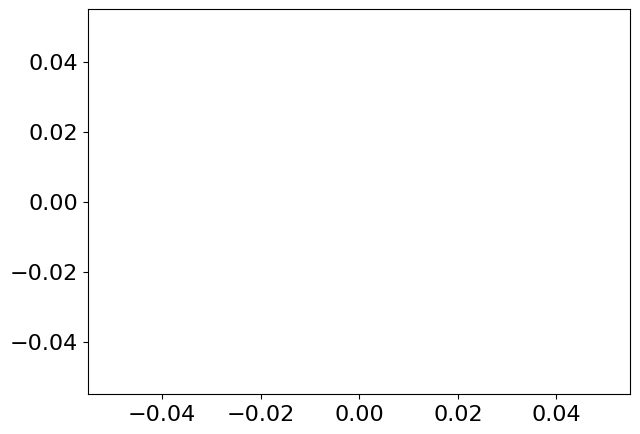

In [279]:
pass_value_barh(data)

Все пропуски были заполнены.

### Очистка от аномалий

In [280]:
# функция проверки аномальных значений

def anomal_check(data):
    ind = []
    columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']
    
    for i in data.index:
        # проверим, что в столбцах с численными значениями нет отрицательных значений, 
        #за исключением намеренно установленных -1
        for col in columns:
            if (data.loc[i, col] != -1) & (data.loc[i, col] < 0):
                ind.append(i)
                          
        # проверим, что оценка критиков не превышает 100
        if data.loc[i, 'critic_score'] > 100:
            ind.append(i)
        
        # проверим, что оценка пользователей не превышает 10
        if data.loc[i, 'user_score'] > 10:
            ind.append(i)
        
    return ind

In [281]:
print('Количество аномалий:', len(anomal_check(data)))

Количество аномалий: 0


In [282]:
# проверим названия платформ
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Аномалии не обнаружены.

### Подсчет суммарных продаж

In [283]:
data['total_sales'] = data['eu_sales'] + data['na_sales'] + data['jp_sales'] + data['other_sales']

In [284]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1,31.38


## Исследовательский анализ данных

In [285]:
# создадим функцию для графиков-распределений

def pl_hist(data, col, title, cond=0, figsize = (12,6), sort=False):
    
    # если условие не задано, то условием будет выбор всех строк
    try:
        if cond == 0:
            cond = [True for i in data.index]
    except:
        cond=cond
    
    if sort == False:
        (
            data[cond]
            .groupby(col)['name']
            .agg('count')
            .plot(kind = 'bar', figsize = figsize, legend = False, fontsize = 12, color = 'SteelBlue')
            .set_title(title + '\n', fontsize = 18, color = 'Black')
        )
    else:
        (
            data[cond]
            .groupby(col)['name']
            .agg('count')
            .sort_values(ascending=False)
            .plot(kind = 'bar', figsize = figsize, legend = False, fontsize = 12, color = 'SteelBlue')
            .set_title(title + '\n', fontsize = 18, color = 'Black')
        )

In [286]:
# создадим функцию для графиков-рейтингов

def pl_barh(data, col, title, cond=0, r='down', figsize = (12,6), agg='count', values='name', top=False):
    
    # настройка сортировки
    if r == 'down':
        r = True
    else:
        r = False
        
    # если условие не задано, то условием будет выбор всех строк
    try:
        if cond == 0:
            cond = [True for i in data.index]
    except:
        cond=cond
        
    if top == False:
        (
            data.loc[cond]
            .groupby(col)[values]
            .agg(agg)
            .sort_values(ascending=r)
            .plot(kind = 'barh', figsize = figsize, legend = False, fontsize = 12, color = 'SteelBlue')
            .set_title(title + '\n', fontsize = 18, color = 'Black')
        )
    else:
        data = (
            data.loc[cond]
            .groupby(col)[values]
            .agg(agg)
            .sort_values(ascending=r)
        )
        (
            data
            .tail(5)
            .plot(kind='barh', figsize = figsize, legend = False, fontsize = 12, color = 'SteelBlue')
            .set_title(title + '\n', fontsize = 18, color = 'Black')
        )

### Продажи по годам

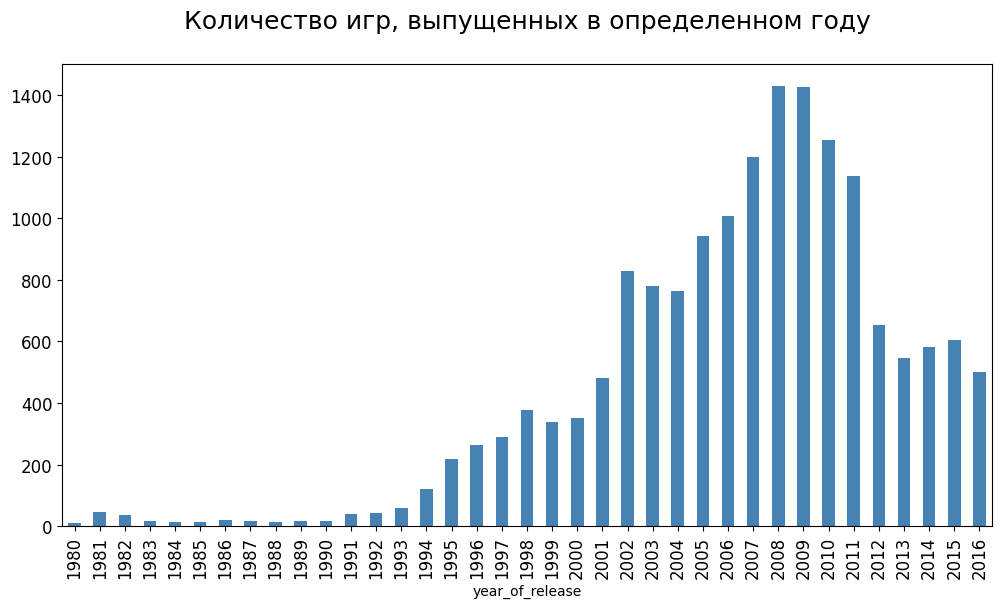

In [287]:
pl_hist(data, 'year_of_release', 'Количество игр, выпущенных в определенном году', (data['year_of_release'] != -1))

In [288]:
print('Скачок 2002-го года:', 
      ratio_into_percent(
          1 - condition_ratio_data(
              data, (data['year_of_release'] == 2001), (data['year_of_release'] == 2002), 'year_of_release')
      ))

Скачок 2002-го года: 42%


In [289]:
print('Скачок 2012-го года:', 
      ratio_into_percent(
          1 - condition_ratio_data(
              data, (data['year_of_release'] == 2012), (data['year_of_release'] == 2011), 'year_of_release')
      ))

Скачок 2012-го года: 43%


Первые годы появления игровых консолей игр было не так уж много. Начиная с 1995 года каждый год выходит уже более 200 игр.

В 2002 году произошёл резкий скачок количества игр (на 42%). Резкий рост, возможно, связан с выходом игр, которые до этого разрабатывались несколько лет, с появлением продолжений (сиквелов и т.д.), в целом со становлением индустрии видео-игр как таковой.

Больше всего новых игр выходило в 2008 и 2009 годах, затем скорость выпуска новых игр начала спадать с резким падением в 2012 году (на 43%). Падение можно попытаться объяснить развитием игр мобильных, а также элементарно бо́льшим требованиям к консольным играм, что сказывается на длительности разработки.

### Продажи по платформам

#### Изменение количества выпускаемых игр и продаж для каждой платформы с течением времени

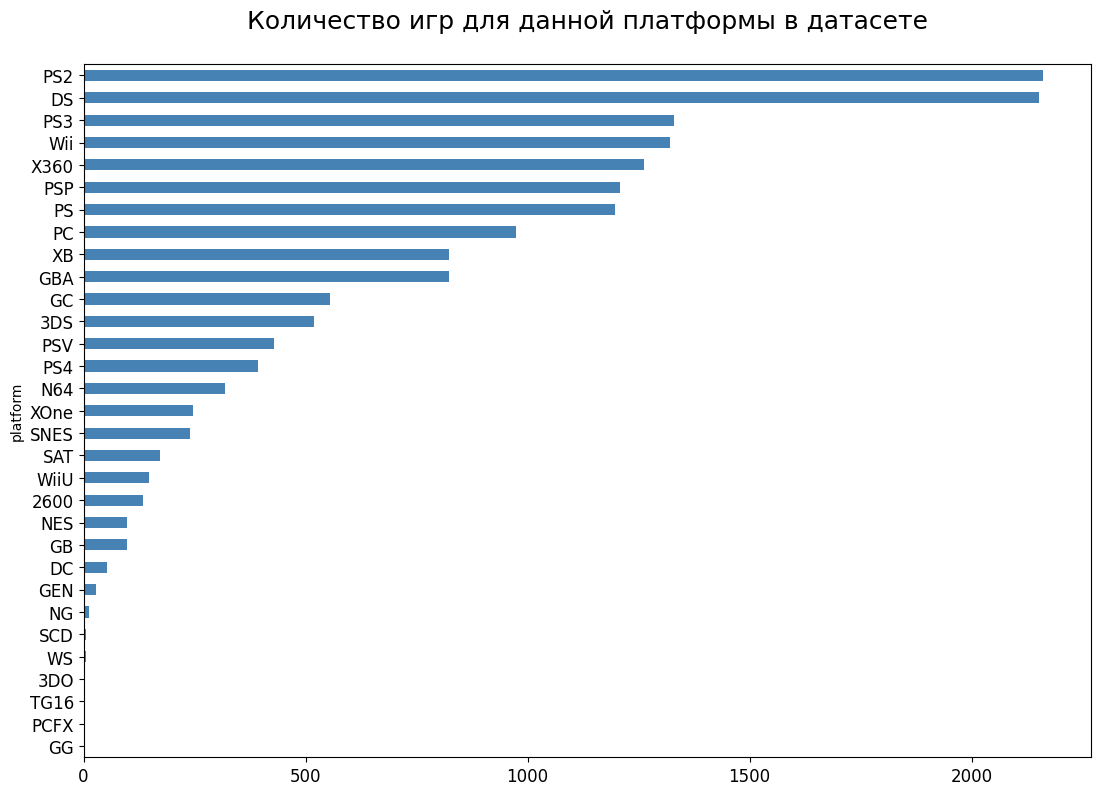

In [290]:
pl_barh(data, 'platform', 'Количество игр для данной платформы в датасете', figsize=(13, 9))

Больше всего игр за рассматриваемый период вышло для консолей PS2 и DS (более двух тысяч в каждом случае). Меньше всего игр выпущено для консолей GG, PCFX, TG16, 3DO. Это одни из самых ранних игровых платформ, поэтому не удивительно, что доля игр на эти платформы в датасете мала.

Изучим время жизни этих платформ.

<!-- # функция для построения графиков по годам для платформ

def time_platform(data, agg, title, col='name', figsize=(18, 14)):
    
    data = data[data['year_of_release'] != -1]
    
    fig, axes = plt.subplots(3, 1)
    fig.suptitle(title + '\n', fontsize = 18, color = 'Black')
    fig.set_figheight(figsize[0])
    fig.set_figwidth(figsize[1])
    
    # построим график для всех платформ из датасета
    legend = []
    for platform in data['platform'].unique():
        data_gr = (data[(data['platform'] == platform) & (data['year_of_release'] != -1)]
               .groupby('year_of_release')
               .agg(agg)
              )
        axes[0].plot(data_gr.index, data_gr[col])
        legend.append(platform)
        
    axes[0].set_title('Все платформы' + '\n', fontsize = 18, color = 'Black')
    axes[0].legend(legend, bbox_to_anchor=(1.0, 1), ncol=2)
    
    # построим график до 2003 года
    legend = []
    till_2003 = data[data['year_of_release'] <= 2003]
    for platform in till_2003['platform'].unique():
        data_gr = (till_2003[(till_2003['platform'] == platform) & (till_2003['year_of_release'] != -1)]
               .groupby('year_of_release')
               .agg(agg)
              )
        axes[1].plot(data_gr.index, data_gr[col])
        legend.append(platform)
        
    axes[1].set_title('\n' + 'До 2003 года' + '\n', fontsize = 18, color = 'Black')
    axes[1].legend(legend, bbox_to_anchor=(1.0, 1), ncol=2)
    
    # построим график для платформ с более, чем 1000 выпущенных игр
    legend = []
    top_data = (
        data
        .groupby('platform')[col]
        .agg(agg)
        .sort_values(ascending=False)
        .head(10)
    )
    
    for platform in top_data.index:
        data_gr = (data[(data['platform'] == platform)]
               .groupby('year_of_release')
               .agg(agg)
              )
        axes[2].plot(data_gr.index, data_gr[col])
        legend.append(platform)
        
    axes[2].set_title('\n' + 'TOP-10' + '\n', fontsize = 18, color = 'Black')
    axes[2].legend(legend, bbox_to_anchor=(1.0, 1), ncol=2) -->

In [291]:
def time_platform(data, agg, title, n=5, col='name', figsize=(15, 25)):
    data = data[(data['year_of_release'] != -1)]
    platforms = data['platform'].unique()
    
    # определим размеры
    N = len(data['platform'].unique())  # всего количество платформ
    h = N // n    # количество графиков с n-штук платформ на нём
    
    # если количество платформ не делится на n ровно, то построим на один график больше,
    # на последнем при этом будет меньше платформ
    if N // n == 0:
        H = 1
    elif N % n != 0:
        H = h + 1
    else:
        H = h
    
    # выделим пространство
    fig, axes = plt.subplots(H, 1, figsize=figsize)
    fig.suptitle(title + '\n', fontsize = 18, color = 'Black')
    
    start = 0
    fin = n
    
    if N // n != 0:
        for i in range(h + 1):  # построим  h графиков с n-штук платформ        
            legend = []
        
            for platform in platforms[start:fin]:   # для каждых n платформ
                # сгруппируем данные для платформы по годам
                data_gr = (
                    data[data['platform'] == platform]
                    .groupby('year_of_release')
                    .agg(agg)
                )
            
                # построим завимисоть от года для платформы
                (
                    axes[i]
                    .plot(data_gr.index, data_gr[col])
                )
            
                # добавим платформу в легенду
                legend.append(platform)
            
            # выведем легенду для графика
            axes[i].legend(legend, bbox_to_anchor=(1.0, 1), ncol=2)
        
            # изменим диапазон индексов для платформ (чтобы перейти к следующей группе)
            start += n
            fin += n
            
    else:  # выполняем, если количество платформ меньше, чем n, т.е. когда нужен только 1 график
        legend = []
        
        for platform in platforms[-(N % n):]:
            # сгруппируем данные для платформы по годам
            data_gr = (
                data[data['platform'] == platform]
                .groupby('year_of_release')
                .agg(agg)
            )
            
            # построим завимисоть от года для платформы
            (
                axes
                .plot(data_gr.index, data_gr[col])
            )
            
            # добавим платформу в легенду
            legend.append(platform)
        
        # выведем легенду для графика
        axes.legend(legend, bbox_to_anchor=(1.0, 1), ncol=2)
            
        return
        
    
    
    # если число платформ не делится без остатка на n, то построим последний график
    # где будут не уместившиеся ранее платформы
    
    if N % n != 0:
        legend = []
        
        for platform in platforms[-(N % n):]:
            # сгруппируем данные для платформы по годам
            data_gr = (
                data[data['platform'] == platform]
                .groupby('year_of_release')
                .agg(agg)
            )
            
            # построим завимисоть от года для платформы
            (
                axes[H-1]
                .plot(data_gr.index, data_gr[col])
            )
            
            # добавим платформу в легенду
            legend.append(platform)
        
        # выведем легенду для графика
        axes[H-1].legend(legend, bbox_to_anchor=(1.0, 1), ncol=2)           
            

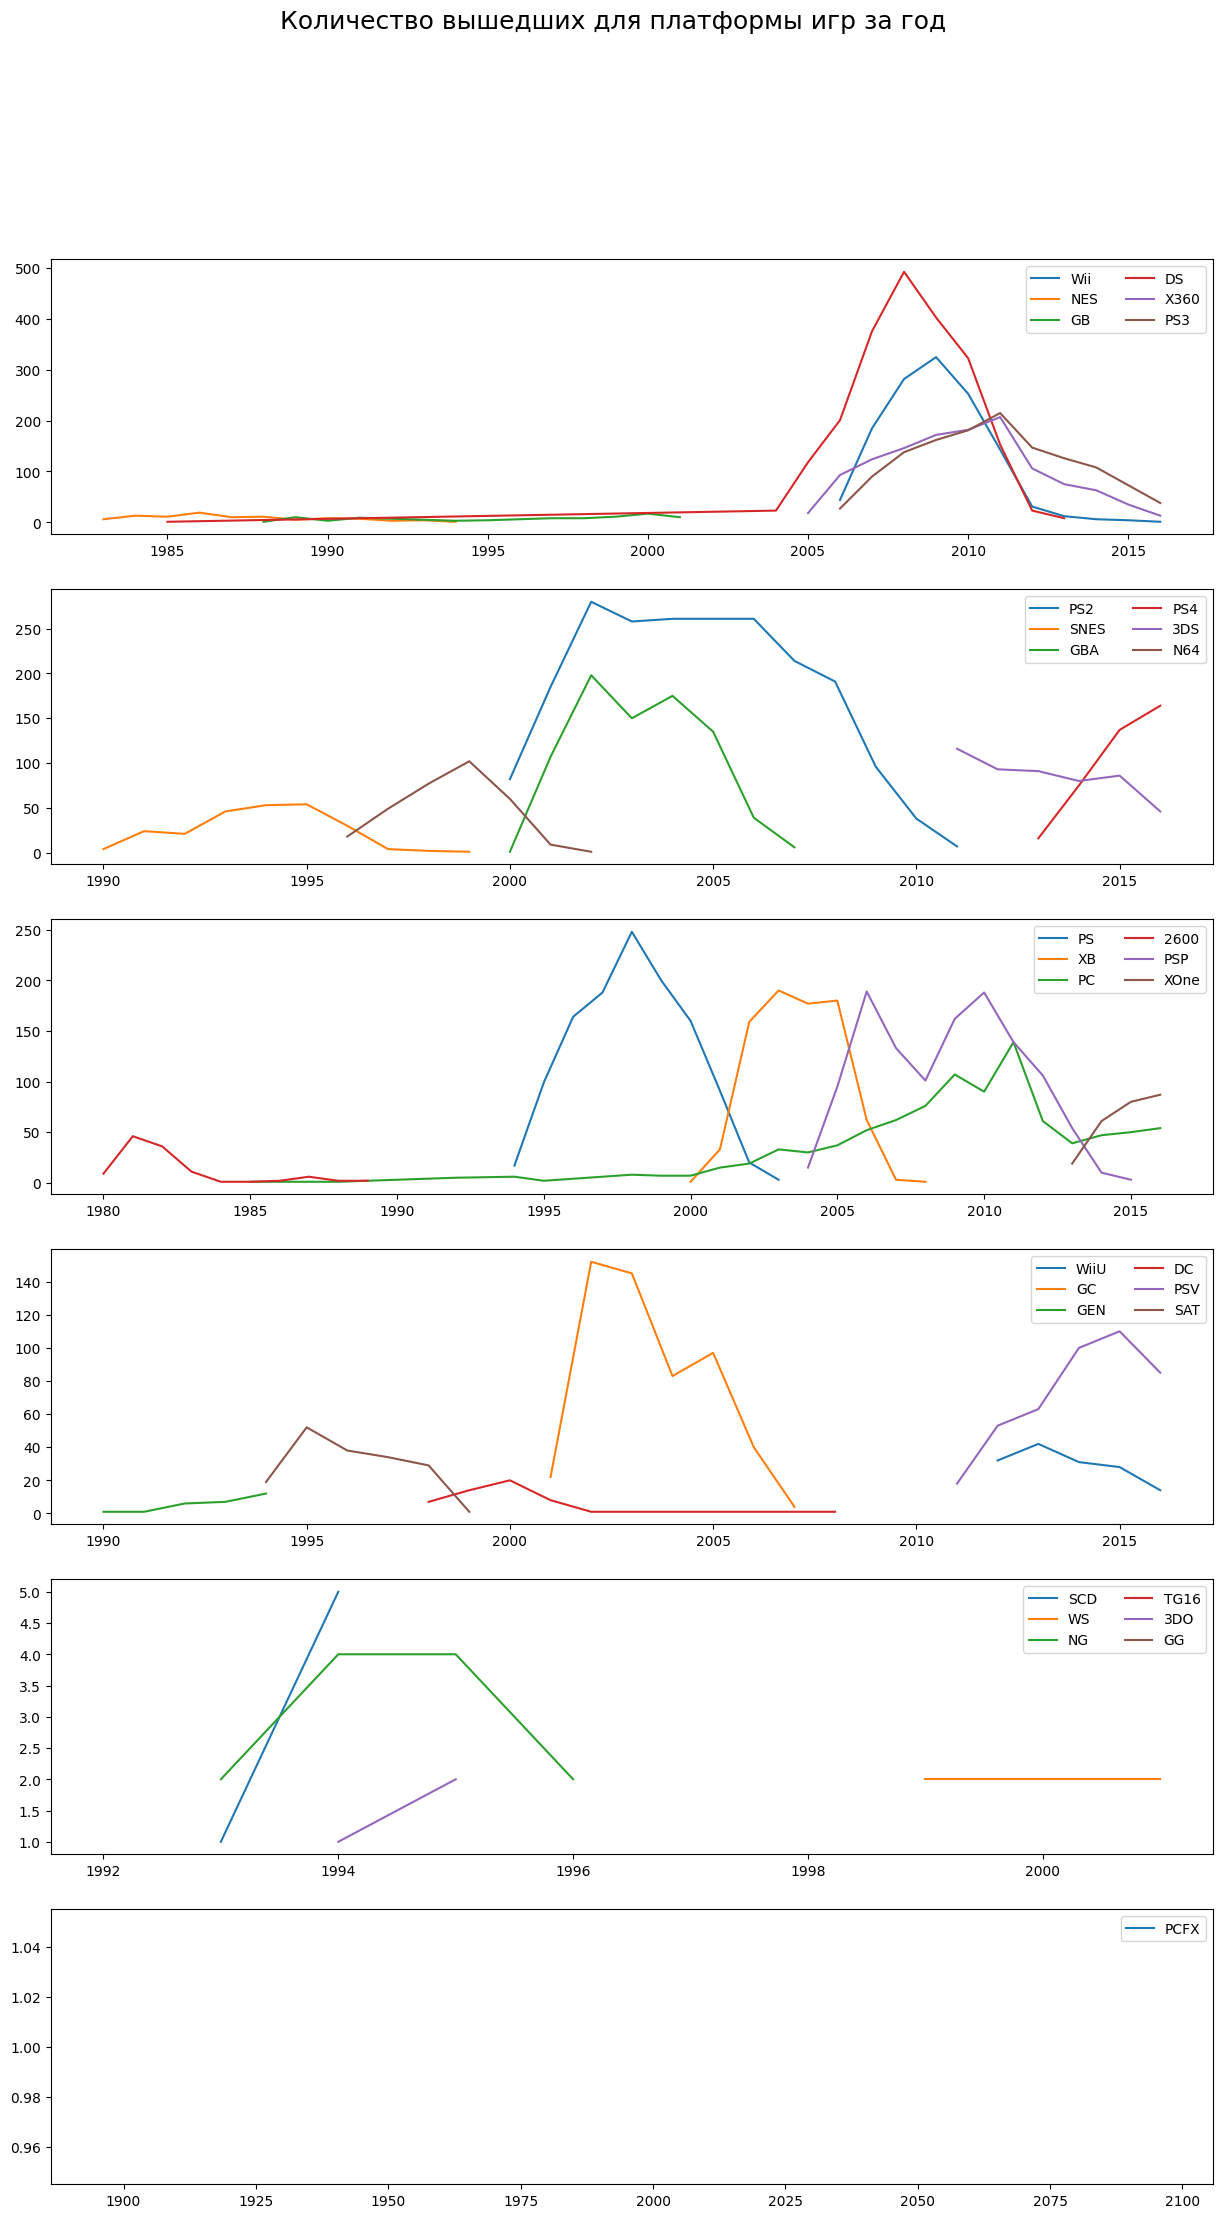

In [292]:
time_platform(data, 'count', 'Количество вышедших для платформы игр за год', n=6);

Немного невнятно видна информация о платформах NES, GB, WS. Построим график для них отдельно.

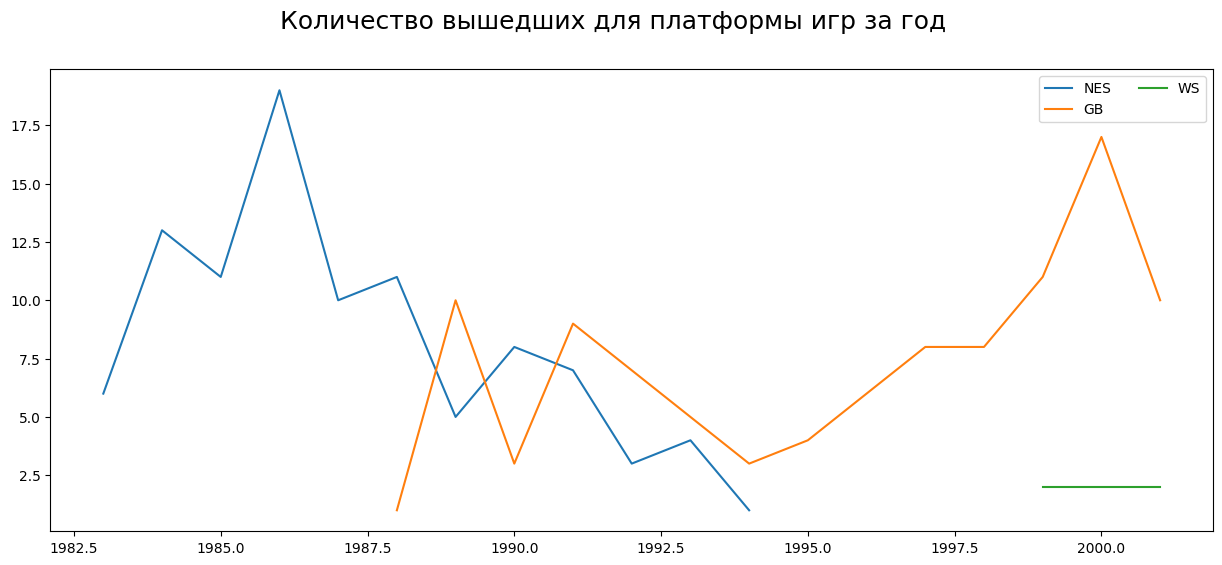

In [293]:
time_platform(data[(data['platform'] == 'WS') | (data['platform'] == 'NES') | (data['platform'] == 'GB')], 
              'count', 'Количество вышедших для платформы игр за год', figsize=(15, 6));

Есть некоторые платформы, для которых есть данные только за 2 года: WS, 3DO, SCD, есть и те, в которых данные представлены только за 1 год (это платформы, данные по которым не отразились на графике). Видимо, эти платформы быстро потеряли свою актуальность или по какой-либо иной причине не прижились на рынке. Возможно, что по какой-либо причине просто отсутствует  информация по ним. В любом случае, это платформы, которыми пользовались до 2001-го года, поэтому на актуальный анализ это не повлияет.

По графикам видно, что с течением времени наблюдается сменяемость лидирующей по популярности (в контексте выпускаемых для неё новых игр) платформ. Например, интересно посмотреть на очередность родственных платформ.

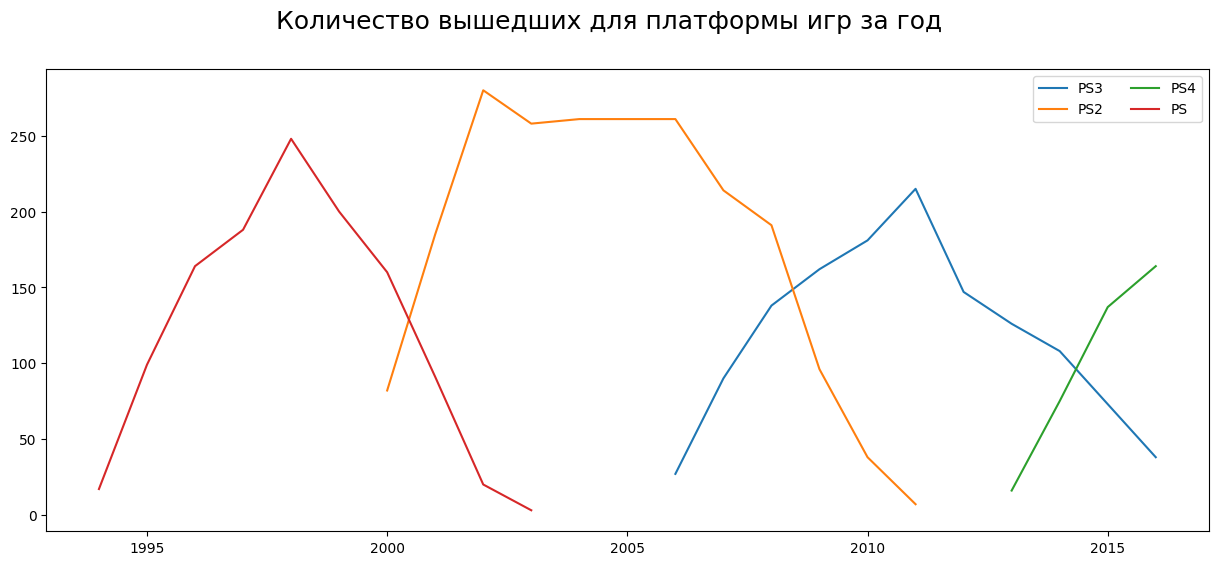

In [294]:
time_platform(data[(data['platform'] == 'PS') | 
                   (data['platform'] == 'PS2') |
                   (data['platform'] == 'PS3') | 
                   (data['platform'] == 'PS4')], 
              'count', 'Количество вышедших для платформы игр за год', figsize=(15, 6));

Кроме того, уже можно сделать вывод о "времени жизни" той или иной платформы: новые игры для конкретной платформы выпускаются от 3 до 10 лет (исключением в этом случае является PC).

Однако старые игры могут довольно долго приносить доход. Посмотрим на изменение во времени продаж от игр для отдельных платформ.

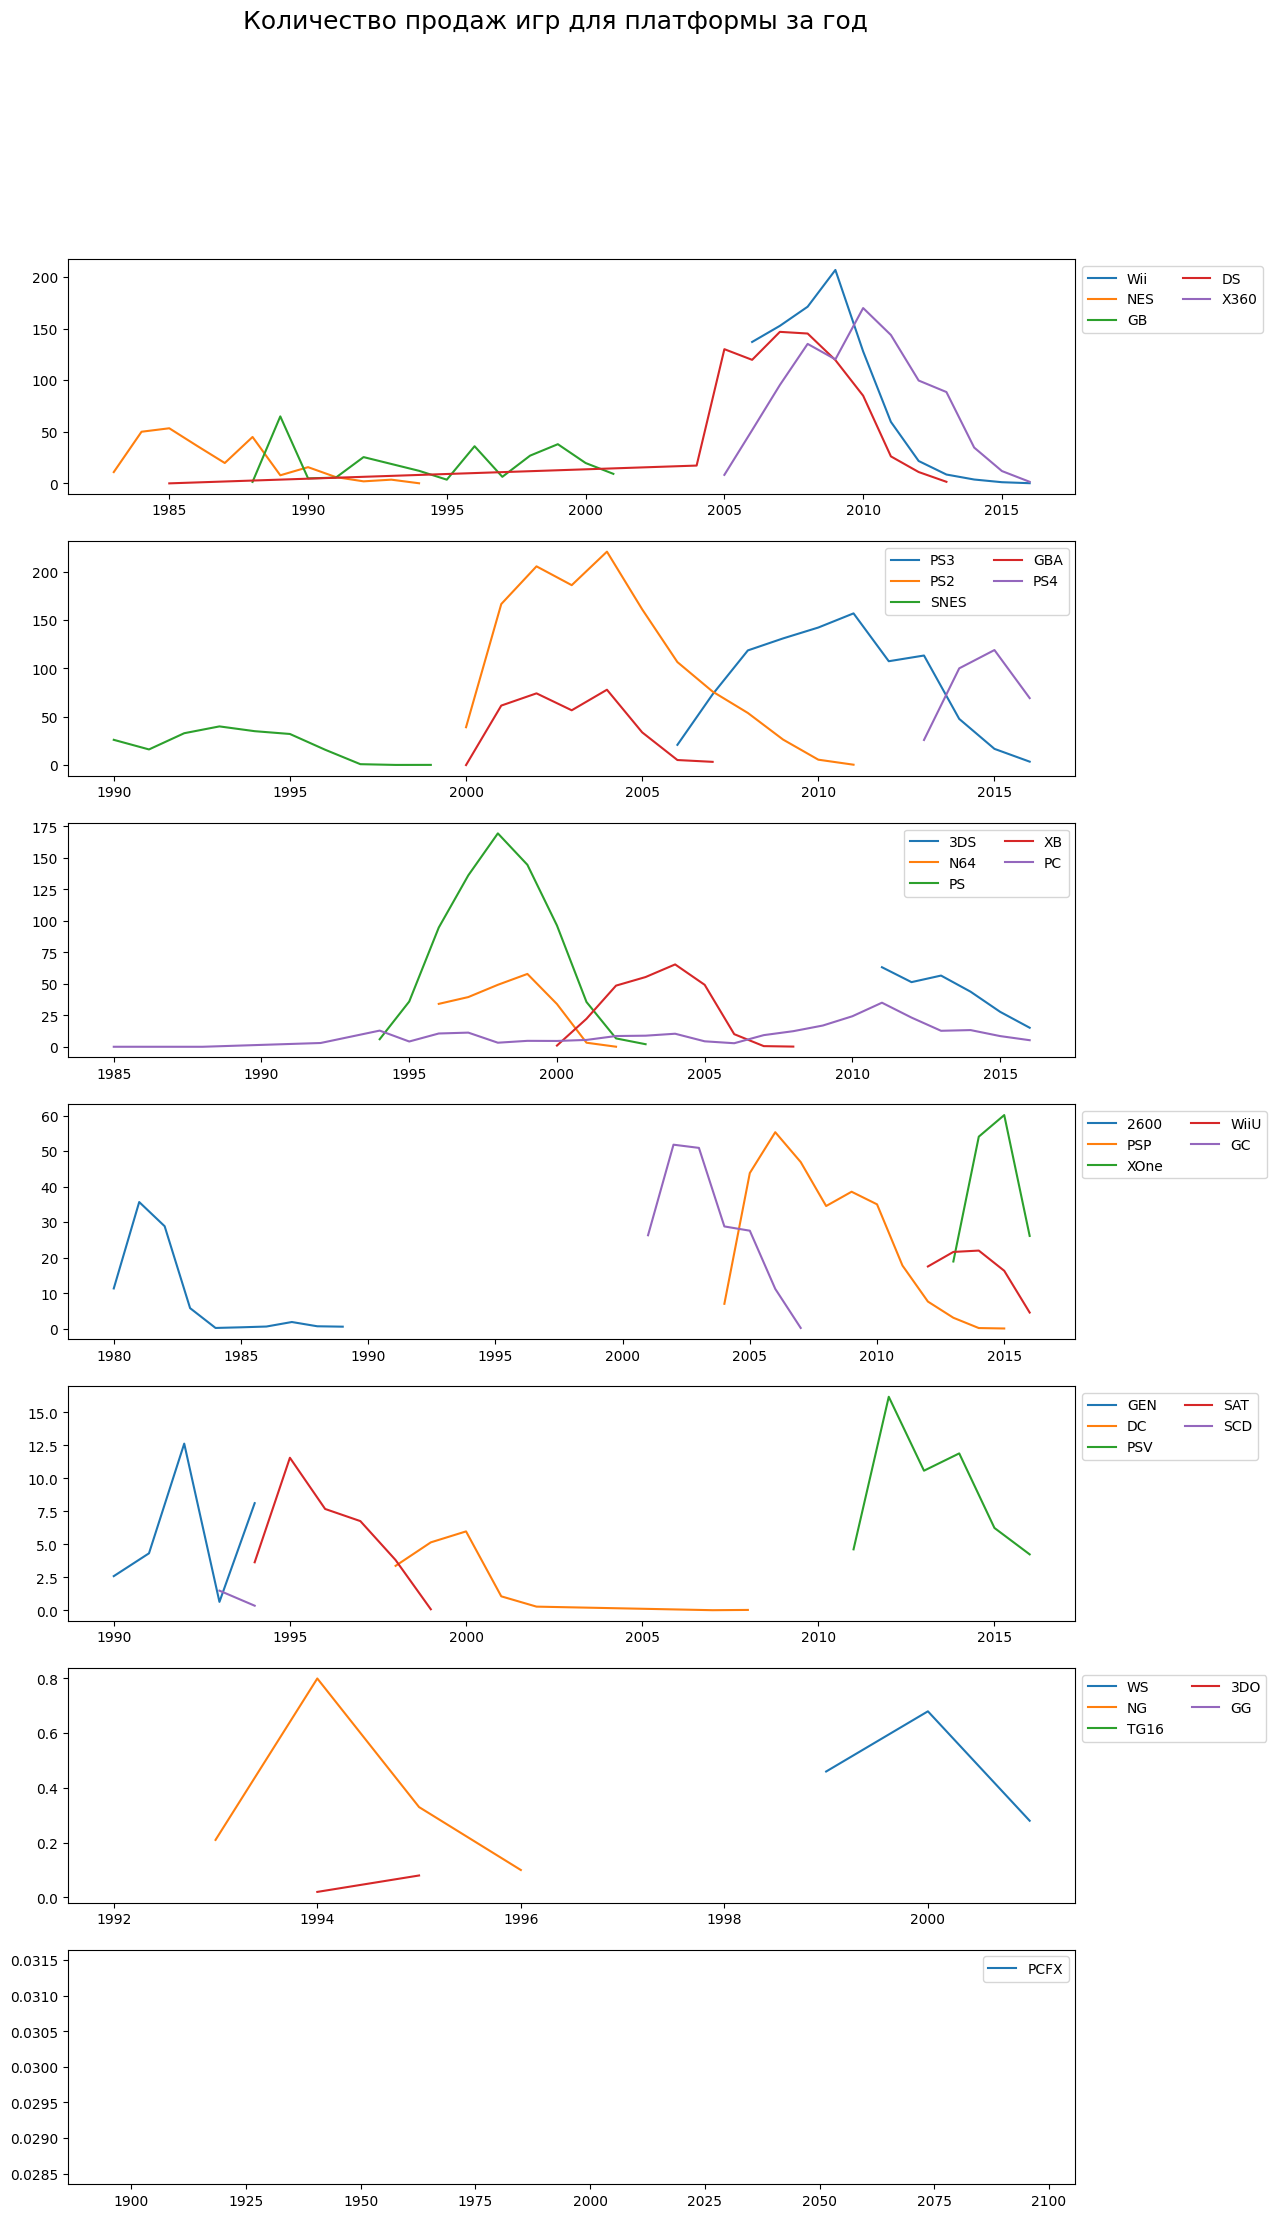

In [295]:
time_platform(data, 'sum', 'Количество продаж игр для платформы за год', col = 'total_sales', figsize = (13, 25) )

Если рассматривать продажи, то картинка не сильно меняется. Популярность платформы также не превышает 10 лет. Сменяемось платформ в первую очеред связана с развитием технологий и постоянным повышением требований к функциональности, качестве, графике.

На одном из графиков явно бросается в глаза выброс: точка в 1985 году для платформы DS. Эта консоль была выпущена в 2004 году, а значит строка с данными в 1985 году - ошибка. Удалим её из датасета.

In [296]:
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,-1,0.02


In [297]:
data = data[~((data['platform'] == 'DS') & (data['year_of_release'] == 1985))]

#### Характерное время жизни платформ

Изучим подробнее времена жизни платформ на основе платформ с наибольшими продажами. Так как на графиках не учитывались игры, в которых по той или иной причине пропущен год, то топ платформы по продажам за всё время могли быть определены не совсем верно, поэтому определим его заново на основе всего датасета.

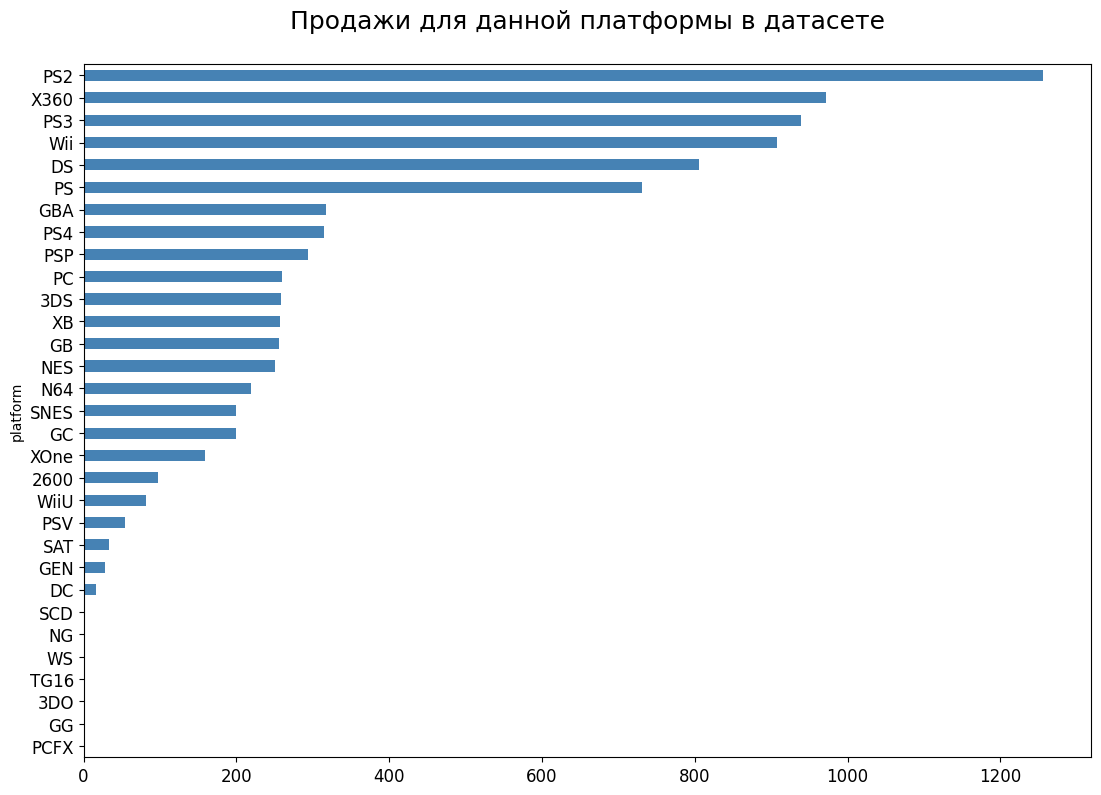

In [298]:
pl_barh(data, 'platform', 'Продажи для данной платформы в датасете', figsize=(13, 9), agg='sum', values='total_sales')

Выберем для рассмотрения первые 6 платформ: PS2, X360, PS3, Wii, DS, PS. На графике видно, что продажи игр для этих платформ превышают остальные более, чем в 2 раза.

In [299]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [300]:
def data_top_time(data, agg, title, top=0, col='name', figsize=(15, 7)):
    
    try:
        if top == 0:
            top = []
            top = data['platform'].unique()
    except:
        top=top
        
    data = data[(data['year_of_release'] != -1)]
    # выделим пространство
    fig, ax = plt.subplots(figsize = figsize)
    legend = []
    
    for platform in top:
        data_gr = (
            data[data['platform'] == platform]
            .groupby('year_of_release')
            .agg(agg)
        )
        ax.plot(data_gr.index, data_gr[col])
        legend.append(platform)
        
    ax.set_title(title + '\n', fontsize = 18, color = 'Black')
    ax.legend(legend, bbox_to_anchor=(1.0, 1), ncol=2, fontsize=12)
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

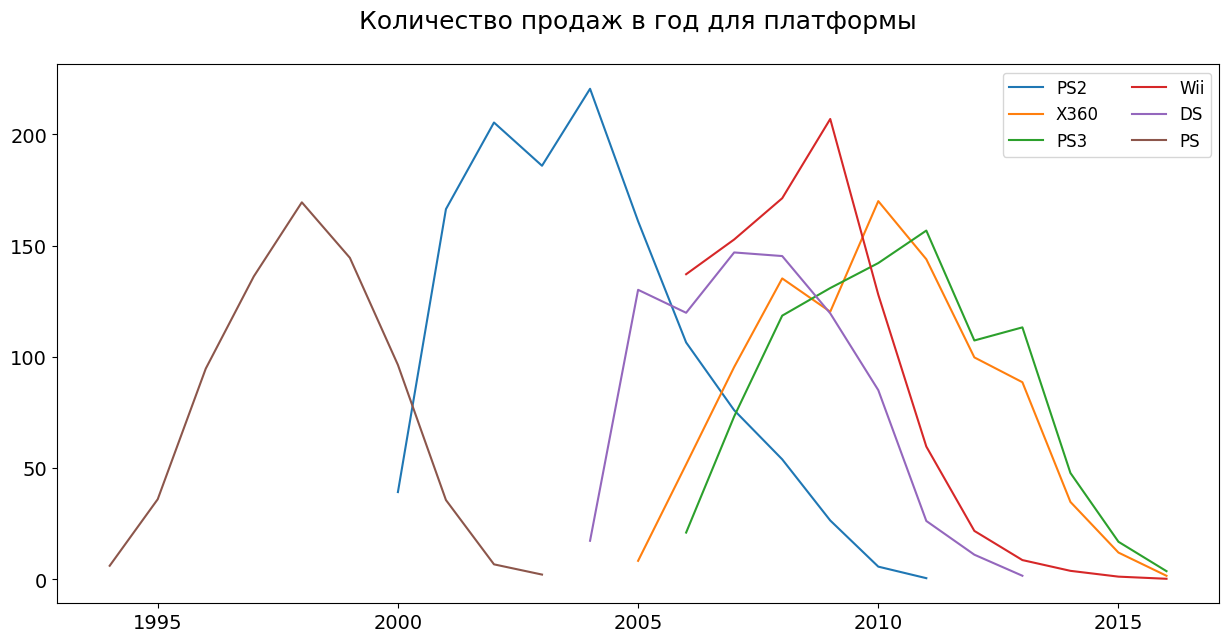

In [301]:
data_top_time(data, 'sum', 'Количество продаж в год для платформы', top_platforms, 'total_sales')

In [302]:
# найдём среднее время жизни
def search_med_time(data, top):
    
    # найдём для топовых платформ первый год существования платформы и последний
    data = (
        data[data['year_of_release'] != -1]
        .pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
    )
    data = data.loc[top]
    data.columns = ['min', 'max']
    
    # расчитаем количество лет
    data['duration'] = data['max'] - data['min']
    
    # вернём среднее значение
    return data['duration'].median()

In [303]:
print('Среднее время жизни платформы (на основе всех продаж):', 
      int(search_med_time(data, data['platform'].unique())), 'лет')

Среднее время жизни платформы (на основе всех продаж): 6 лет


In [304]:
print('Среднее время жизни платформы (на основе продаж самых популярных платформ):', 
      int(search_med_time(data, top_platforms)), 'лет')

Среднее время жизни платформы (на основе продаж самых популярных платформ): 10 лет


Таким образом характерный срок появления новых и исчезновения старых платформ - **6 лет**. Однако самые популярные платформы находятся на рынке вплоть до **10 лет**.

#### Актуальная динамика

Основываясь на предыдущих графиках, можно за актуальный период взять годы с 2013 по 2016: этот период захватывает конец спада самых популярных на данный момент платформ, а также непосредственно зарождение новых. Такой выбор способствует:
* анализу тенденций в игровой индустрии и интересах пользователей в играх на основе уже утвердившихся и хорошо распространившихся консолей;
* учесть появление новых консолей, чтобы ориентироваться на новые технологии;
* не учитывать давно изжившие себя платформы;
* с учетом того, что время жизни платформы составляет 6-10 лет, то в выбранном периоде не будет таких платформ, которые успеют "родиться" и "умереть" внутри этого периода.

Для последующего исследования оставим только актуальные данные.

Изучим снова данные по всем платформам, но за выбранный актуальный период, чтобы определить текущую ситуацию на рынке.

In [305]:
actual = data[data['year_of_release'] >= 2013].copy()

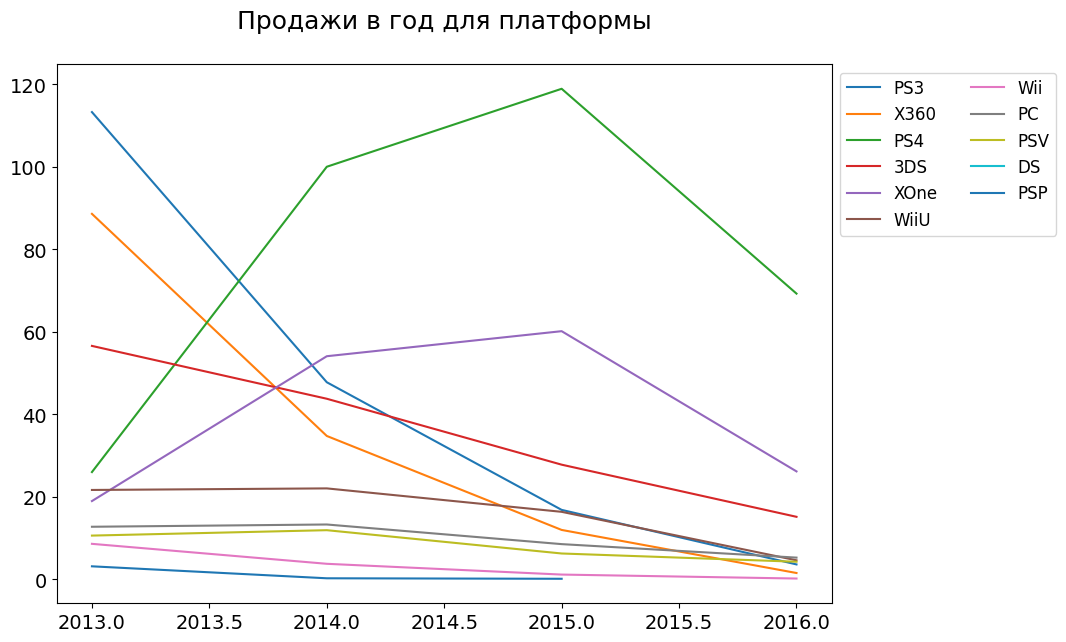

In [306]:
data_top_time(actual, 'sum', 
              'Продажи в год для платформы', col='total_sales', figsize=(10, 7))

Итак, к 2016-му году изжили себя: DS, PSP, Wii и наиболее популярные X360 и PS3. Быстро сходит на нет сильно стартовавшая 3DS. Самыми актуальными платформами в 2016 году становятся PS4 и XOne, однако, судя по графику, пик их популярности уже миновал и приходится на 2015. Последнее наблюдение может не соответствовать действительности по той причине, что в датасете могут быть представлены данные не за весь 2016 год и на самом деле популярность этих платформ растёт и далее.

*Из этого делаем вывод, что далее наиболее популярными в 2017-м будут платформы **PS4** и **XOne**. Третья по популярности на 2016-й - **3DS**.* На остальные платформы приходится менее 10 млн по имеющимся данным на 2016-й год. *Но важно обратить внимание и на менее популярные, но ещё используемые платформы, поэтому добавим в список из них те платформы, которые приносили наибольшую выручку по данным на 2016-й год: **PS3**, **WiiU**, **PC**, **PCV**.*

#### Разброс по продажам 

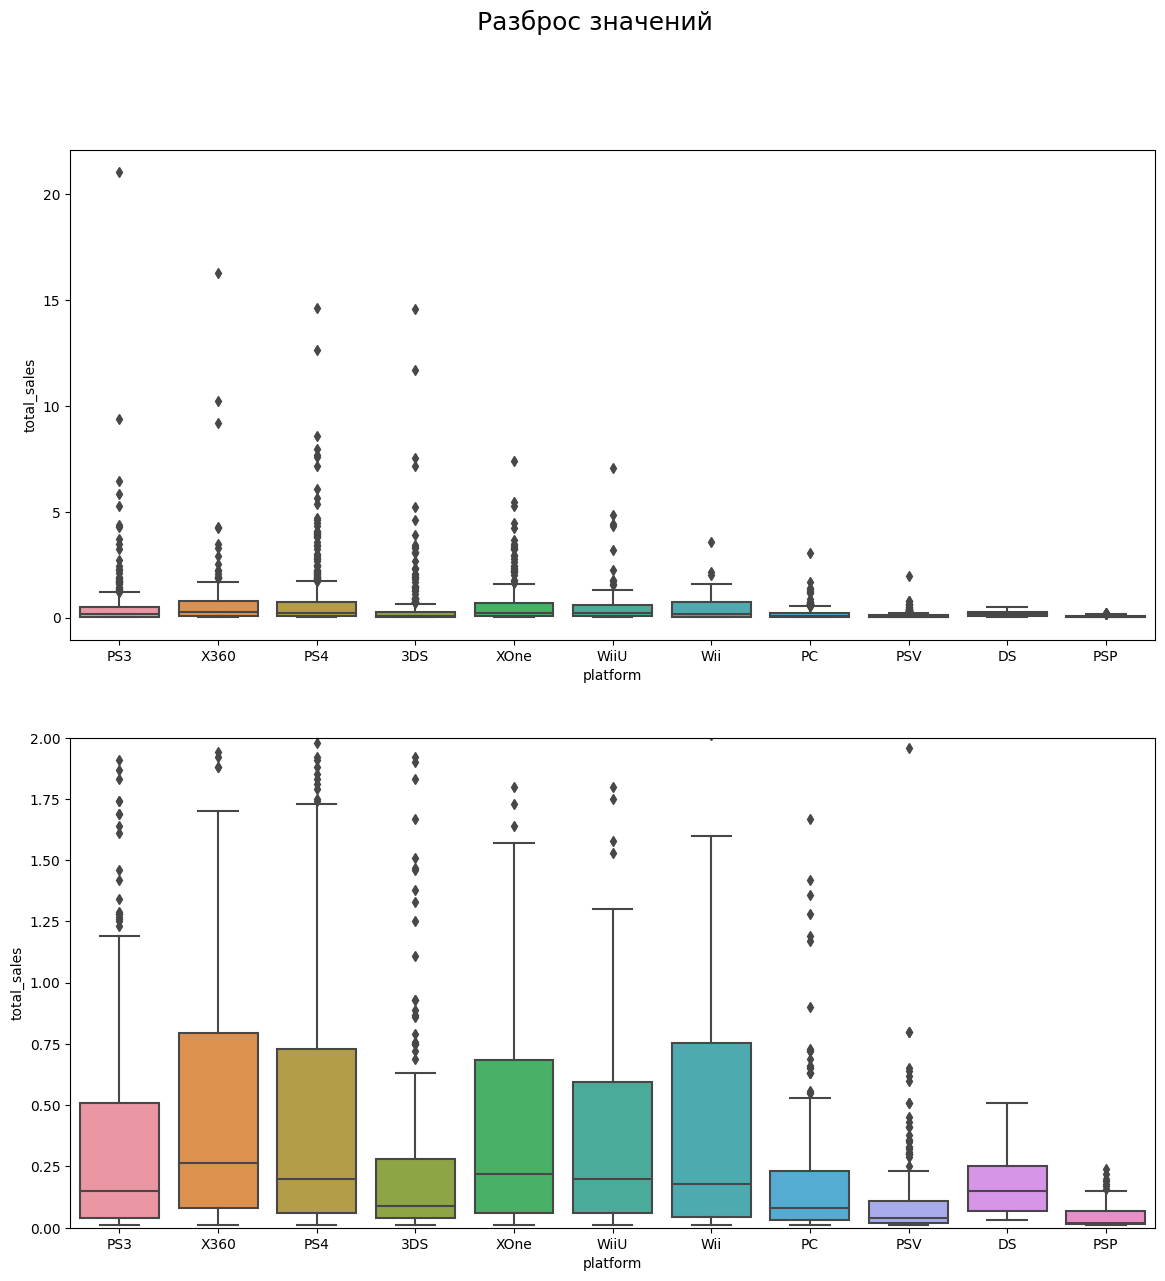

In [307]:
fig = plt.figure(figsize=(14, 14))
fig.suptitle('Разброс значений' + '\n', fontsize = 18, color = 'Black')

fig.add_subplot(211)
sns.boxplot(data=actual, x='platform', y='total_sales')

fig.add_subplot(212)
sns.boxplot(data=actual, x='platform', y='total_sales').set_ylim(0, 2);

В среднем, внутри одной платформы продажи игры составляют от 0,1 до 0,25 млн: большинство игр не приносят высокой прибыли. Меньше всего средняя (и максимальная, не считая выбросов) прибыль для платформ PSP, PSV, 3DS, DS и PC. Для первых четырех платформ такое отставание закономерно - на данный актуальный период времени эти платформы уже "погибают", т.е. теряют свою популярность и, как следствие, дают меньший доход. PC же во всех отношениях выделяющаяся платформа, поэтому такое же обоснование здесь не подходит.

In [308]:
print('Время жизни платформы PC:', int(search_med_time(data, 'PC')), 'год')

Время жизни платформы PC: 31 год


PC, он же персональный компьютер, выделяется от остальных как минимум временем своей жизни. Но, если исходить из того, что речь именно о персональном компьютере, а не о некоторой консоли, предназначенной только для игр, то легко сделать вывод, что эта платформа будет существовать и далее.

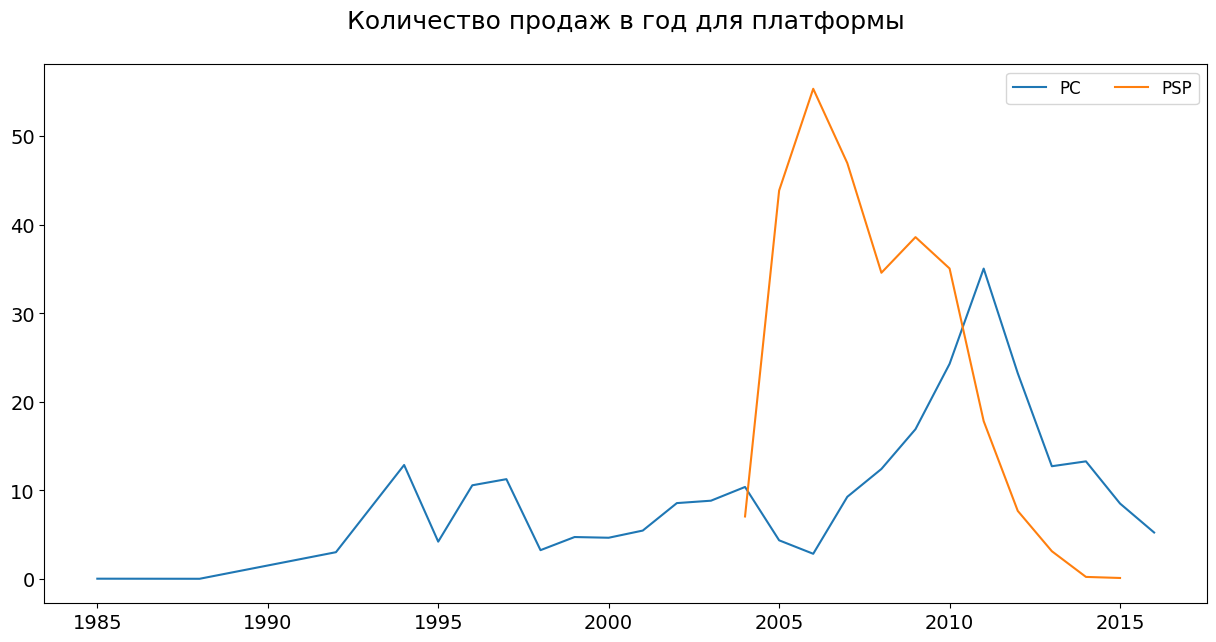

In [309]:
data_top_time(data, 'sum', 'Количество продаж в год для платформы', ['PC', 'PSP'], 'total_sales')

Кроме того, если посмотреть изменение продаж за всё время существования платформы, то можно наблюдать её цикличность: существуют сменяющиеся периоды роста и спада.

Выше специально для сравнения выведена вторая платформа (выбрана PSP исходя из наиболее удобного масштаба для сравнения, качественно это справедливо и для других платформ): её график куполообразный, с явно выраженным ростом, периодом особой популярности и затем резким спадом, что не совпадает с поведением PC. Таким образом, PC необходимо рассматривать отдельно от остальных платформ и **следить за циклами популярности игр для этой платформы**. На актуальный период интерес к PC спадал, поэтому можно не выделять много на эту платформу, однако важно следить за дальнейшим развитием.

Вернёмся к ящикам с усами. На актуальный период времени самыми доходными (без учёта выбросов) являются X360, PS4, XOne, Wii: максимальные продажи находятся выше 1,5 млн. Здесь повторно подтверждается выбор в пользу продуктов на платформы PS4 и XOne.

Интереснее ситуация с выбросами на графике: с особо успешными по тем или иным причинам играм, имеющим большую прибыль от продаж. Здесь более всего выделяются платформы X360 и PS3. И только за ними уже следует PS4, игры для которой достигали максимальных продаж в 15 млн, XOne при этом сильно отстаёт - не более 7 млн.

#### Влияние на продажи отзывов

Рассмотрим влияние отзывов критиков и пользователей на продажи игр внутри одной платформы. Для примера возьмём платформу PS3: она относится к актуальному периоду, прошла цикл роста и спада. По этим же критериям подойдёт и платформа X360

In [310]:
# создадим функцию для построения графиков рассеяния

def scatter_pl(data, platform, x, y, title, cond=0, figsize=(14, 7)):
    
    try:
        if cond == 0:
            cond = [True for i in data.index]
    except:
        cond=cond
    
    # срез на нужное доп. условие
    data = data[cond]
    
    # отсекаем данные с заглушками
    data = data[data[x] > -1]
        
    # выбираем игры только для нужной платформы
    data = data[data['platform'] == platform]
    
    (
        data
        .plot(x=x, y=y, kind='scatter', figsize=figsize, legend=False, fontsize=12, color='SteelBlue', ec='LightSteelBlue')
        .set_title(title + '\n', fontsize = 18, color = 'Black')
    )

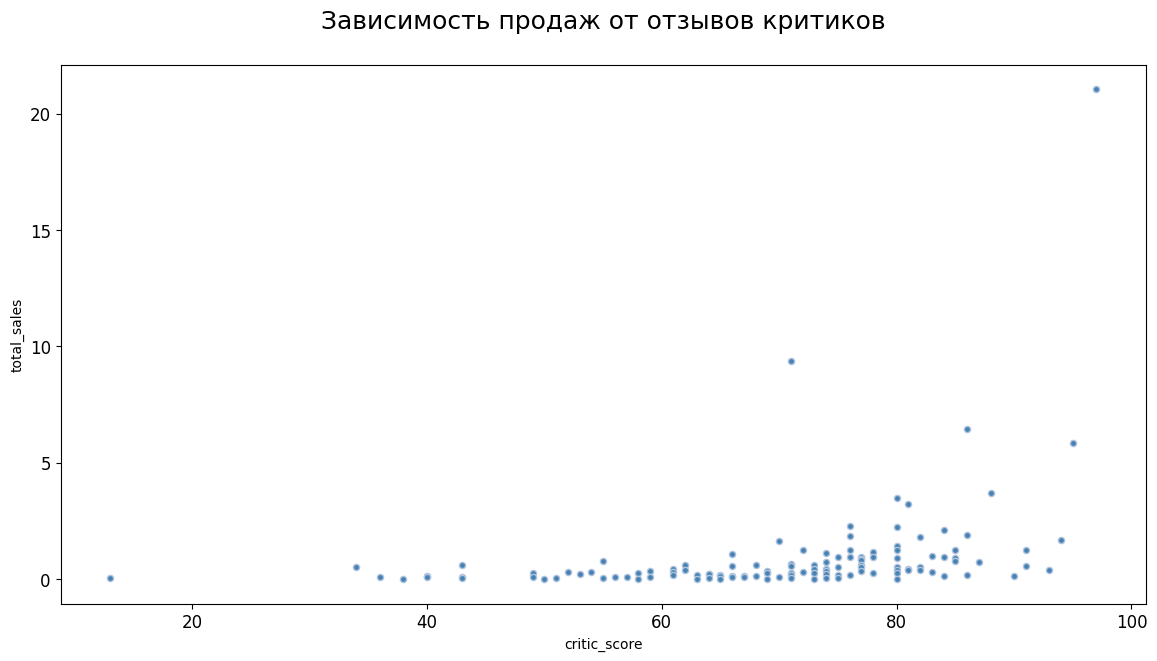

In [311]:
scatter_pl(actual, 'PS3', 'critic_score', 'total_sales', 'Зависимость продаж от отзывов критиков')

Нельзя с уверенностью сказать, что положительные отзывы критиков гарантируют большие продажи, однако на графике рассеяния отчетливо видно, что там, где отзывы плохие, там больших продаж нет. То есть для игр с хорошими отзывами критиков максимально возможные продажи больше, чем для игр с плохими отзывами, но на минимальные продажи это влияет слабо: только в случае оценок 95 и выше нижняя планка продаж начинает отрываться от остальных.

Ради интереса сравним полученное с матрицей рассеяния для платформы Х360.

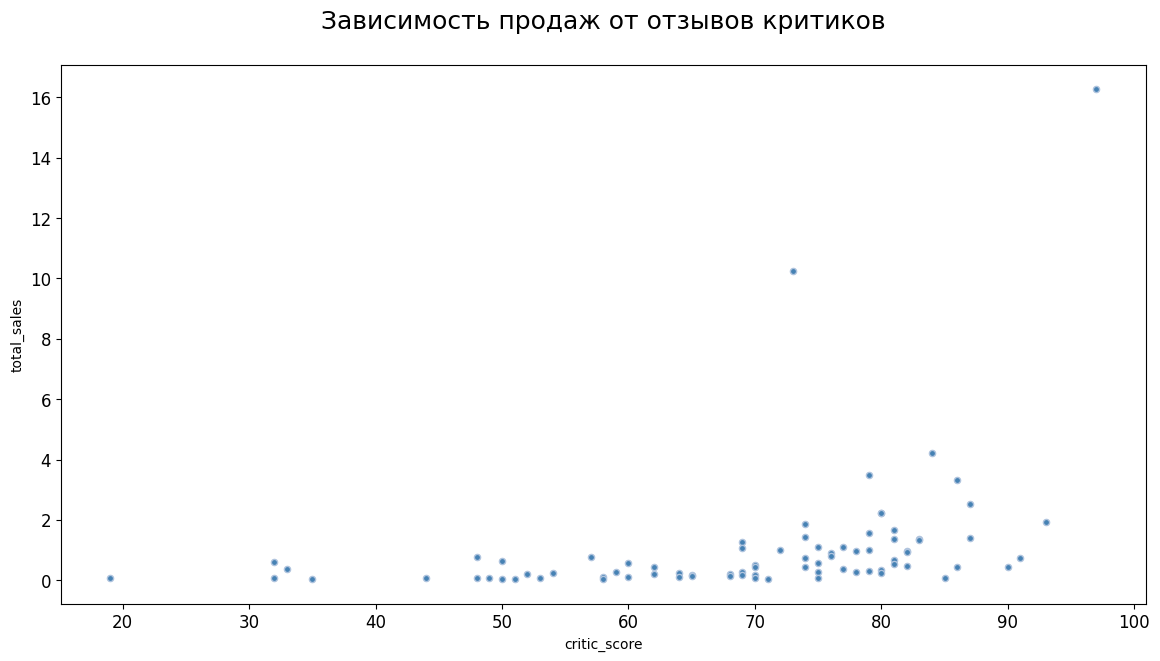

In [312]:
scatter_pl(actual, 'X360', 'critic_score', 'total_sales', 'Зависимость продаж от отзывов критиков')

Наблюдаемые зависимости аналогичны.

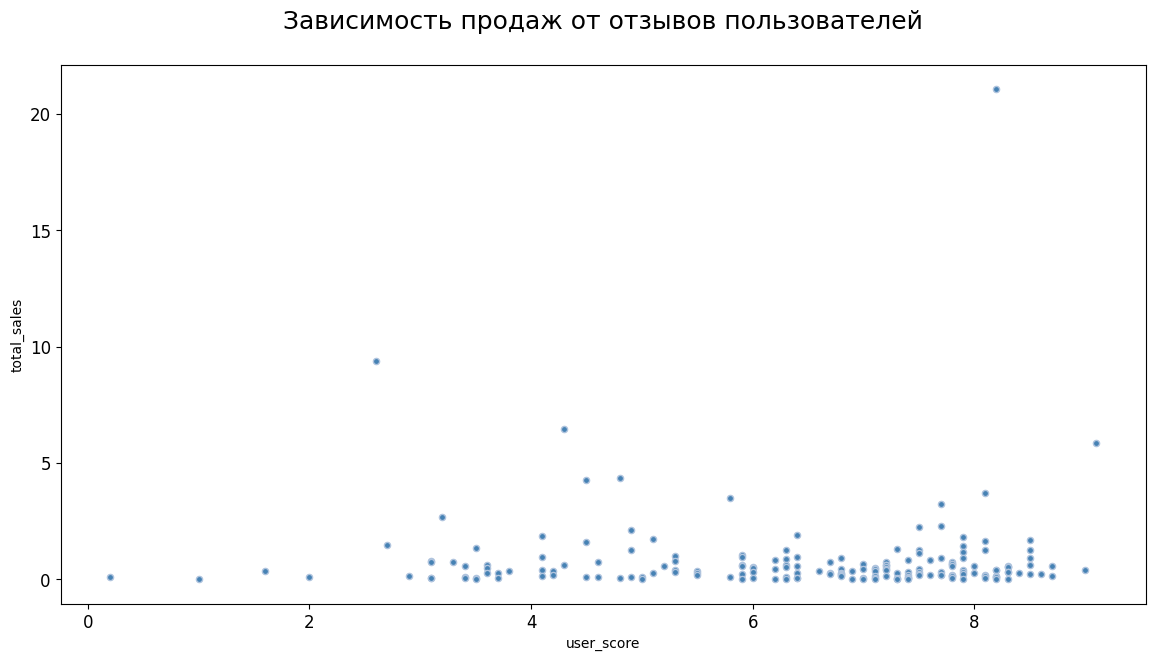

In [313]:
scatter_pl(actual, 'PS3', 'user_score', 'total_sales', 'Зависимость продаж от отзывов пользователей')

С отзывами пользователей уже всё не так однозначно: и игры с плохой оценкой вполне могут иметь 10 млн с продаж, если смотреть на даные в целом. Но в среднем сохраняется следующая закономерность: чем выше оценка, тем больше максимальные продажи, но хорошая оценка не гарантирует высоких продаж.

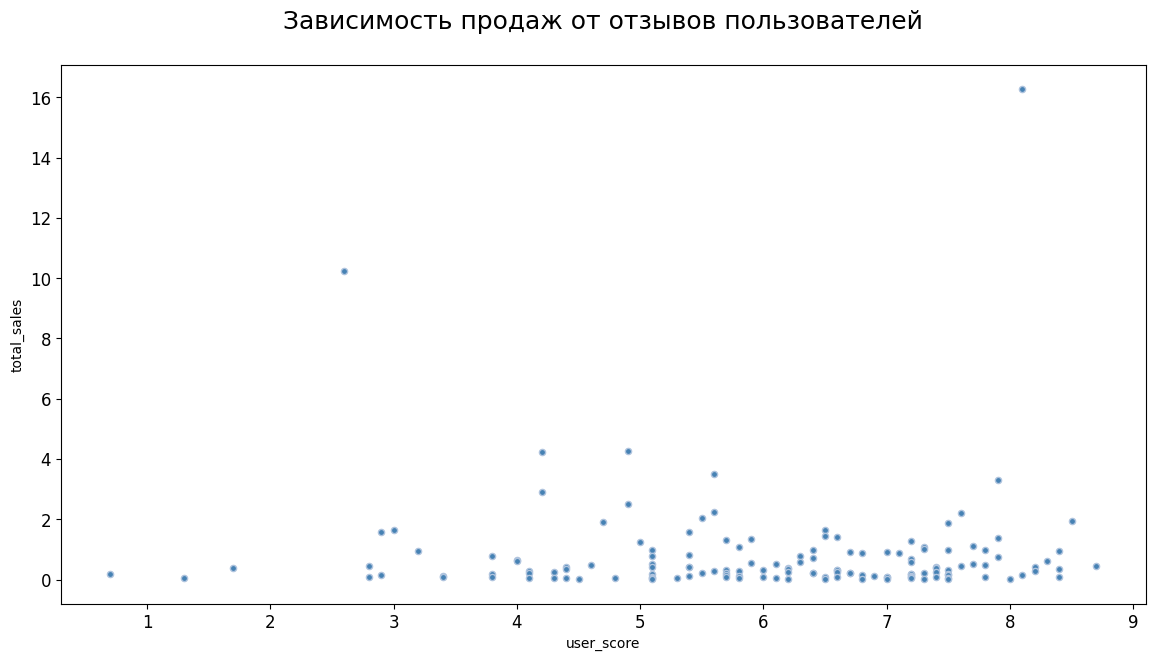

In [314]:
scatter_pl(actual, 'X360', 'user_score', 'total_sales', 'Зависимость продаж от отзывов пользователей')

Вывод аналогичный.

Посмотрим на корреляцию между параметрами.

In [338]:
def corr_coef(df, param1, param2, cond=0):
    try:
        if cond == 0:
            cond = [True for i in df.index]
    except:
        cond=cond
    
    # срез на нужное доп. условие
    df = df.loc[cond]
    
    return df[param1].corr(df[param2])

In [339]:
for score in ['critic_score', 'user_score']:
    if 'critic' in score:
        print(
            'Корреляция продаж с оценкой критиков:', 
            corr_coef(actual[actual['platform'] == 'PS3'], score, 'total_sales', cond=(actual[score] > -1)).round(2)
        )
    else:
        print(
            'Корреляция продаж с оценкой пользователей:', 
            corr_coef(actual[actual['platform'] == 'PS3'], score, 'total_sales', cond=(actual[score] > -1)).round(2)
        )

Корреляция продаж с оценкой критиков: 0.33
Корреляция продаж с оценкой пользователей: 0.0


Получаем подтверждение выводов выше: прямой завимисости между отзывами и продажами нет, однако некоторым влиянием обладает именно оценка критиков.

In [165]:
def corr_matrix(data, params, value, platforms=0, cond=0, figsize=(15, 40), title='Матрица корреляции'):
    
    try:
        if cond == 0:
            cond = [True for i in data.index]
    except:
        cond = cond
    
    # срез на нужное доп. условие
    data = data[cond]
    
    # избавимся от строк, где нет данных ни об одном, ни о другом параметре для платформы
    data = data[~((data[params[0]] == -1) & (data[params[1]] == -1))]
    
    try:
        if platforms == 0:
            platforms = data['platform'].unique()
    except:
        platforms = platforms
    
    # заменим заглушки на пустые значения, 
    # чтобы в графике не учитывались именно пустые ячейки, а не отбрасывались целые строки
    for param in params:
        data.loc[data[param] == -1, param] = None
    
    data = data.loc[:, params + value + ['platform']]
    n = len(platforms)
    
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title, fontsize = 16, color = 'Black')
    
    
    i = 1
    for platform in platforms:
        fig.add_subplot(int(np.ceil(n/2)), 2, i)
        sns.heatmap(
            data[(data['platform'] == platform)].corr()[['total_sales']], 
            cmap="Blues", annot=True, cbar=False, annot_kws={'size':12}, vmin=0, vmax=1  
        );
        plt.title(platform + '\n', fontsize = 12, color = 'Black')
        i += 1
        
    fig.tight_layout(h_pad=2)
    plt.subplots_adjust(top=0.93)

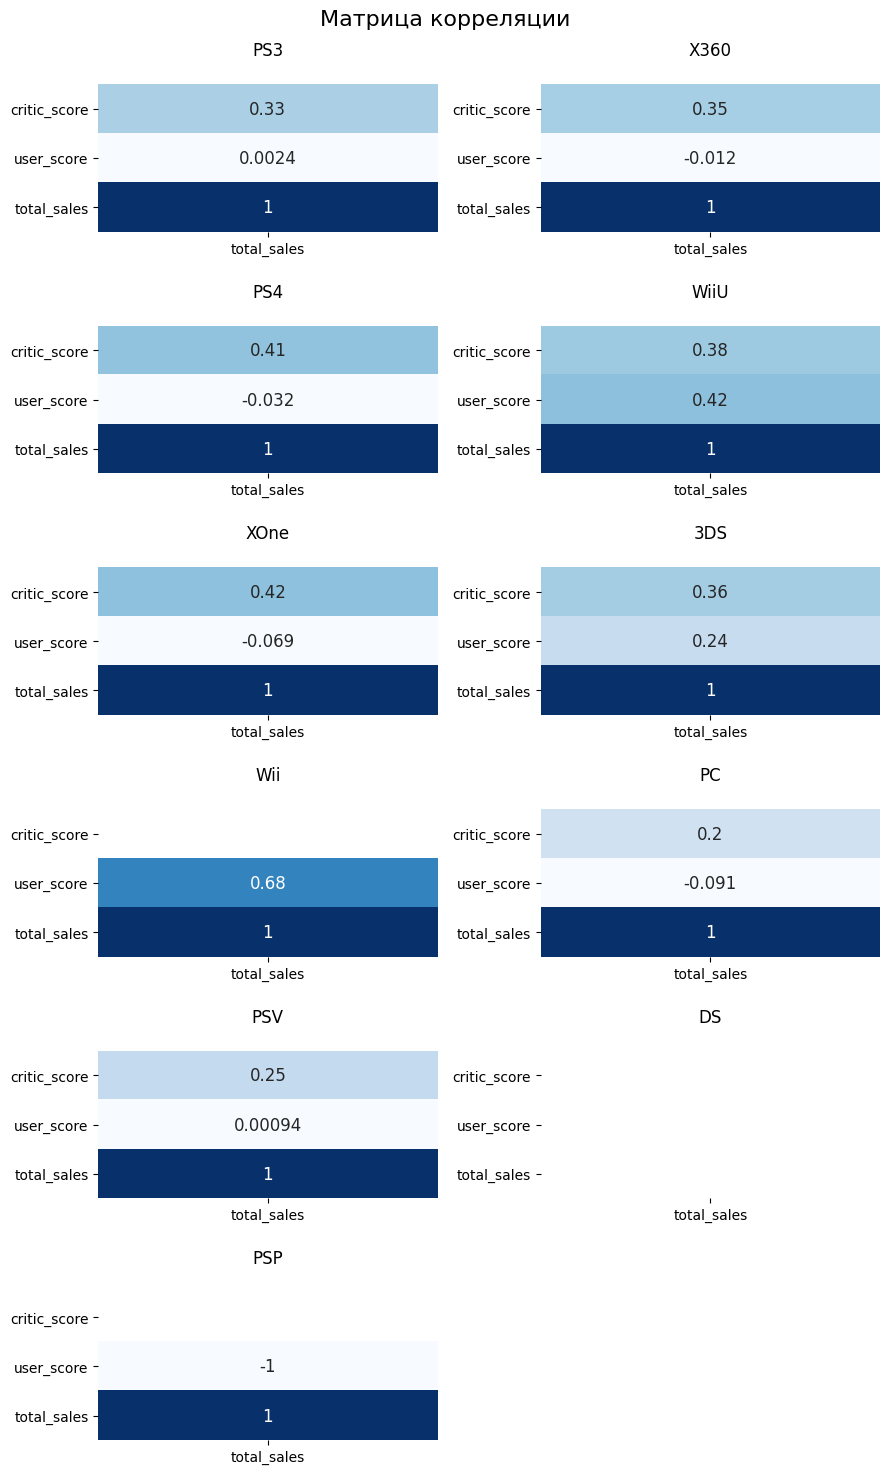

In [168]:
corr_matrix(actual, ['critic_score', 'user_score'], ['total_sales'], figsize=(9, 15))

Выводы, сделанные на основе платформы PS3 о взаимосвязи оценки критиков или пользователей и игровых продаж подтверждаются для большинства платформ: X360, PS4, XOne, PC, PSV. Немного отличаются актуальные результаты для платформ WiiU и 3DS - для них влияние пользователей и критиков равнозначно. Интересный результат получен для платформы Wii - оценок критиков для этой платформы нет вовсе, зато оценка пользователей сильно сказывается на выручку игры.

Вопросы вызывают графики платформ DS и PSP, посмотрим непосредственно на соответствующие данные.

In [92]:
actual[~((actual['critic_score'] == -1) & (actual['user_score'] == -1)) & 
       (actual['platform'] == 'DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5054,LEGO Marvel Super Heroes,DS,2013,Action,0.22,0.13,0.0,0.03,-1.0,4.8,E10+,0.38


In [93]:
actual[~((actual['critic_score'] == -1) & (actual['user_score'] == -1)) & 
       (actual['platform'] == 'PSP')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
7875,FIFA 14,PSP,2013,Sports,0.0,0.15,0.00,0.04,-1.0,3.4,E,0.19
8969,Summon Night 5,PSP,2013,Role-Playing,0.0,0.00,0.15,0.00,74.0,8.3,T,0.15


In [94]:
# проверим заодно выделяющиеся платформы: Wii, WiiU
for platform in ['Wii', 'WiiU']:
    print('Данные по', platform + ':')
    display(actual[~((actual['critic_score'] == -1) & (actual['user_score'] == -1)) & 
                   (actual['platform'] == platform)])

Данные по Wii:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
359,Just Dance 2014,Wii,2013,Misc,1.88,1.39,0.0,0.31,-1.0,6.2,E10+,3.58
766,Skylanders SWAP Force,Wii,2013,Platform,1.21,0.75,0.0,0.19,-1.0,6.6,E10+,2.15
850,Just Dance 2015,Wii,2014,Misc,0.99,0.85,0.0,0.17,-1.0,8.4,E10+,2.01
1158,Disney Infinity,Wii,2013,Action,1.05,0.41,0.0,0.14,-1.0,4.2,E10+,1.60
3611,FIFA 15,Wii,2014,Sports,0.15,0.37,0.0,0.04,-1.0,4.3,E,0.56
4985,FIFA 14,Wii,2013,Sports,0.00,0.36,0.0,0.02,-1.0,4.3,E,0.38
6443,Angry Birds Star Wars,Wii,2013,Strategy,0.15,0.09,0.0,0.02,-1.0,2.8,E,0.26


Данные по WiiU:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
110,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09
247,Splatoon,WiiU,2015,Shooter,1.54,1.18,1.46,0.26,81.0,8.5,E10+,4.44
260,Super Mario 3D World,WiiU,2013,Platform,2.11,1.16,0.73,0.32,93.0,9.0,E,4.32
424,Super Mario Maker,WiiU,2015,Platform,1.18,0.89,0.94,0.20,88.0,8.7,E,3.21
720,New Super Luigi U,WiiU,2013,Platform,1.25,0.62,0.18,0.18,77.0,7.9,E,2.23
...,...,...,...,...,...,...,...,...,...,...,...,...
16300,Barbie and Her Sisters Puppy Rescue,WiiU,2015,Action,0.00,0.01,0.00,0.00,-1.0,2.8,E,0.01
16412,Legend of Kay Anniversary,WiiU,2015,Action,0.00,0.01,0.00,0.00,67.0,7.1,E10+,0.01
16420,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,0.00,0.00,0.01,0.00,70.0,7.4,E,0.01
16510,Art Academy: Home Studio,WiiU,2015,Misc,0.00,0.00,0.01,0.00,82.0,8.3,E,0.01


Для DS график пустой, потому что невозможно посчитать взаимосвязь данных по одной точке. Для PSP корреляция построена только по двум точкам, поэтому не удивительно, что мы получили абсолютную взаимосвязь двух величин. То есть про связь оценок и глобальных продаж для этих двух платформ на актуальный период мы ничего сказать не можем.

Результаты, полученные для платформы WiiU считаем достоверными в связи с достаточным количеством данных. А вот результат Wii можем поставить под сомнение, так как рассмотрено только 7 игр, а, как известно, маленькие выборки дают неожиданные результаты.

#### Распределение игр по жанрам

Изучим, какие жанры более распространены: какого жанра игр больше в актуальный период, а также посмотрим, какие из них имеют больший доход от продаж.

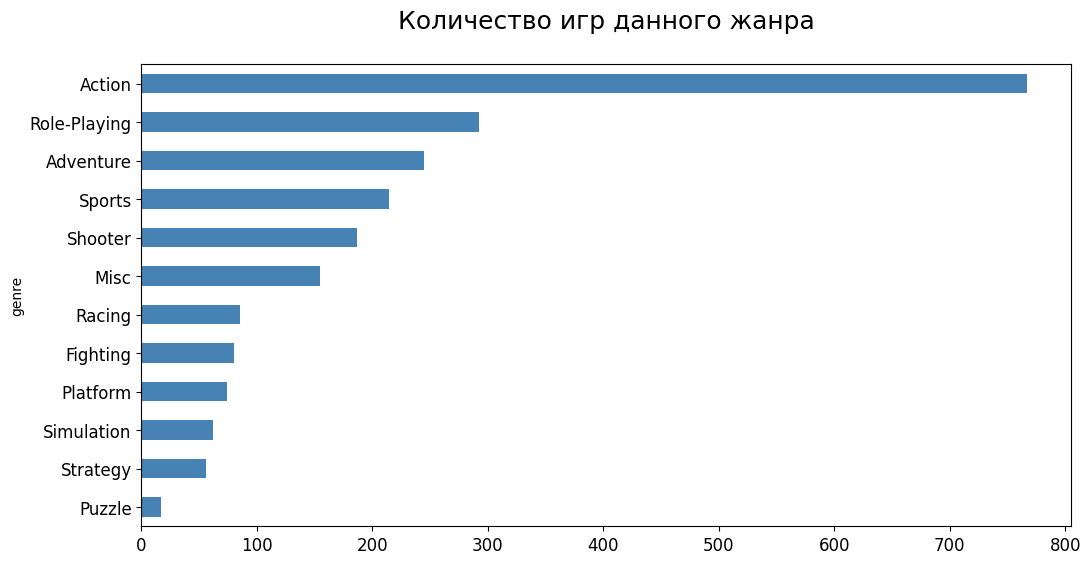

In [95]:
pl_barh(actual, 'genre', 'Количество игр данного жанра', agg='count', values='name')

На актуальный период получаем следующее:
* **больше всего издавалось игр жанра *Action***
* относительно много издавалось игр Misc, Sports, Role-Playing, Adventure, Shooter
* мало игр следующих жанров: Racing, Simulation, Fightin, Strategy, Platform, Puzzle

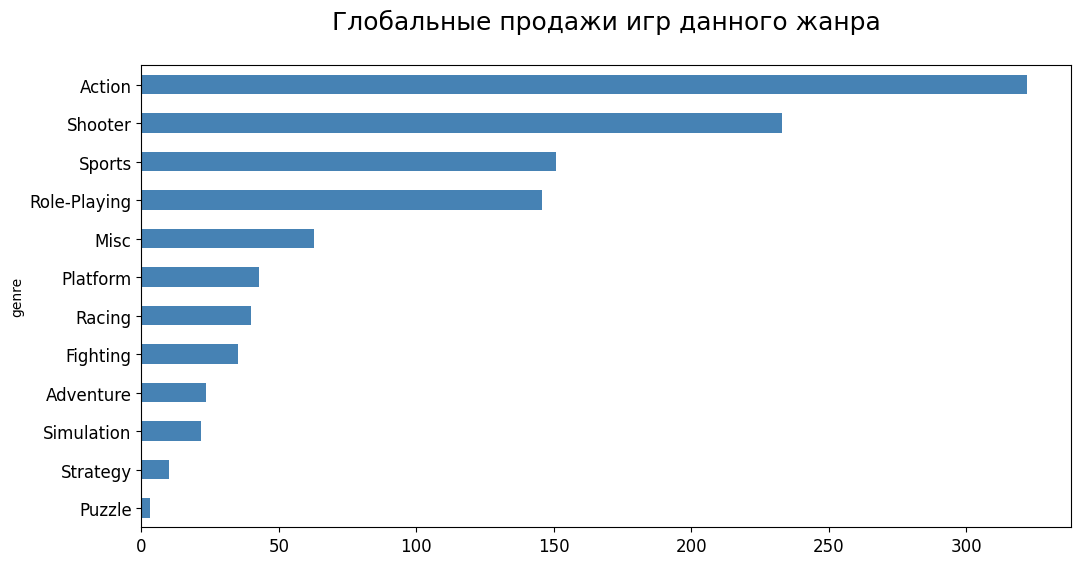

In [96]:
pl_barh(actual, 'genre', 'Глобальные продажи игр данного жанра', agg='sum', values='total_sales')

Распределение количества игр по жанрам не соотносится с распределением глобальных продаж игр по жанрам:
* **лидирующая позиция остаётся за *Action***
* к 5-ке выделяющихся относятся *Shooter, Sports, Role-Playing, Misc*

Судя по тому, что игр жанра Sports, Shooter и Role-Playing значительно меньше на рынке, чем Action, продажи между ними отличаются уже слабее (но тем не менее заметно). Значит, игры жанра Action стоят дешевле, чем остальные в 4-ке лидеров.

В таком случае, посмотрим на медианные продажи по жанрам на всём рынке, чтобы учесть разницу в ценах за игры.

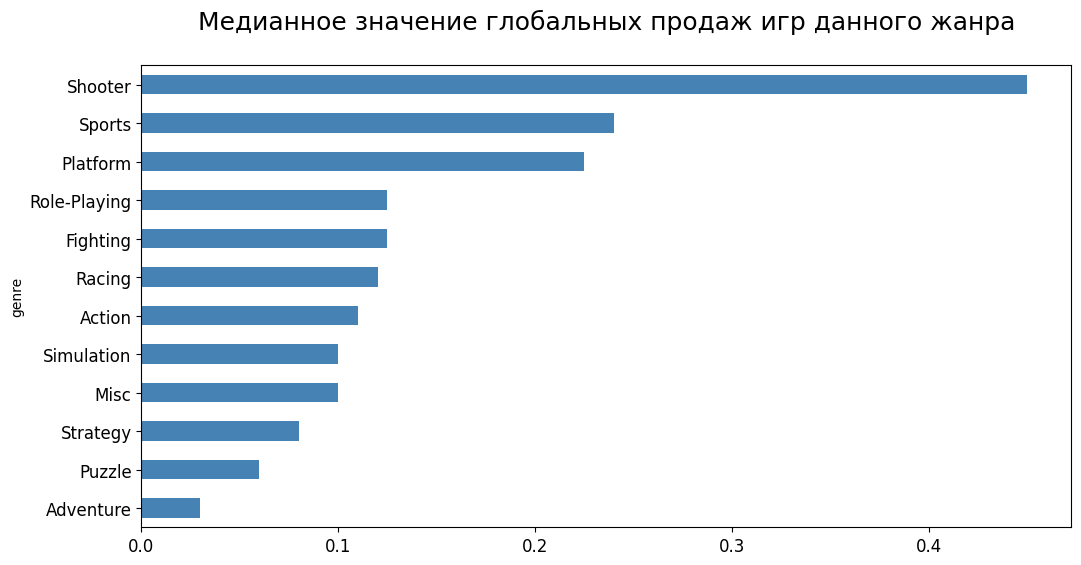

In [97]:
pl_barh(actual, 'genre', 'Медианное значение глобальных продаж игр данного жанра', agg='median', values='total_sales')

По медианным значениям игры жанра *Action* отнюдь не самые прибыльные сами по себе. Стабильно высокую выручку приносят жанры **Shooter**, **Sports**, **Platform**, при этом шутеры в среднем дают практически на 50% большую выручку, чем следующий за ним в рейтинге жанр Sports. Остальные жанры ещё почти вполовину отстают от замыкающего в тройке лидеров. Самые низкие продажи оказываются за жанром *Adventure*.

Итак,
* с течением времени наблюдается сменяемость лидирующей по популярности (как в контексте количества выпускаемых игр, так и выручки от продаж) платформы. При этом характерный срок появления новых и исчезновения старых платформ - 6-10 лет;
* за всё время, самой большой выручкой обладают: PS2, X360, PS3, Wii, DS, PS;
* актуальный период для изучения: с 2013 по 2016 гг.;
* наиболее популярными на конец актуального периода оказались платформы **PS4**, **XOne** и **3DS**;
* на следующий год также стоит рассматривать платформы PS3, WiiU, PC, PCV
* в среднем, внутри одной платформы продажи игры составляют от 0,1 до 0,25 млн;
* PC необходимо рассматривать отдельно от остальных платформ и следить за циклами популярности игр для этой платформы
* на актуальный период времени самыми доходными (без учёта выбросов) являются X360, PS4, XOne, Wii: максимальные продажи находятся выше 1,5 млн;
* чем выше оценка критиков, тем больше максимальные продажи, но хорошая оценка не гарантирует высоких продаж;
* пользовательская оценка практически не влияет на продажи, исключениями являются платформы WiiU и 3DS: для них влияния оценки критиков и пользователей одинаковы
* на актуальный период больше всего издано игр жанра Action
* суммарно глобальные продажи наиболее большие для игр жанра Action
* в среднем большую выручку приносят жанры Shooter, Sports, Platform

## Портрет пользователя каждого региона

Чтобы получить портрет пользователя отдельных регионов, ответим на следующие вопросы:
* Какие платформы самые популярные для этого региона?
* Какие жанры наиболее популярны для региона?
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы

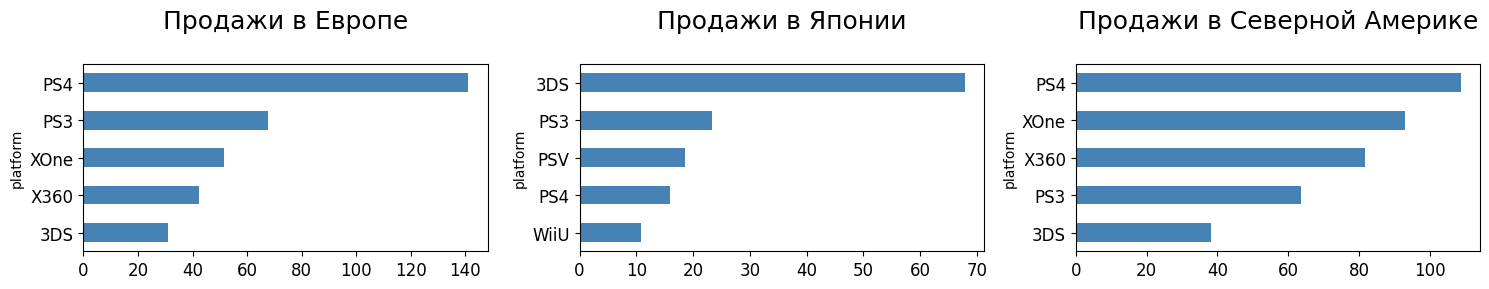

In [169]:
fig = plt.figure(figsize=(30, 10))
#fig.suptitle('Самые популярные платформы (ТОР 5)' + '\n', fontsize = 18, color = 'Black')

for place in ['eu_sales', 'jp_sales', 'na_sales']:
    
    if 'eu' in place:
        fig.add_subplot(131)
        pl_barh(actual, 'platform', 'Продажи в Европе', agg='sum', values=place, top=True, figsize=(15, 3))
    elif 'jp' in place:
        fig.add_subplot(132)
        pl_barh(actual, 'platform', 'Продажи в Японии', agg='sum', values=place, top=True, figsize=(15, 3))
    else:
        fig.add_subplot(133)
        pl_barh(actual, 'platform', 'Продажи в Северной Америке', agg='sum', values=place, top=True, figsize=(15, 3))
        
    fig.tight_layout()

Популярные платформы в разных местах разнятся.
* Пользователь Европы больше всего предпочитает PS4. Популярность остальных резко ниже, но в топ-3 также присутствуют PS3, XOne
* Абсолютный лидер платформ в Японии - 3DS. Продажи игр на остальные платформы ниже более, чем на 60%
* В Северной Америке нет особых платформ-любимчиков, к топ-3 относятся: PS4, XOne, X360

### Самые популярные жанры

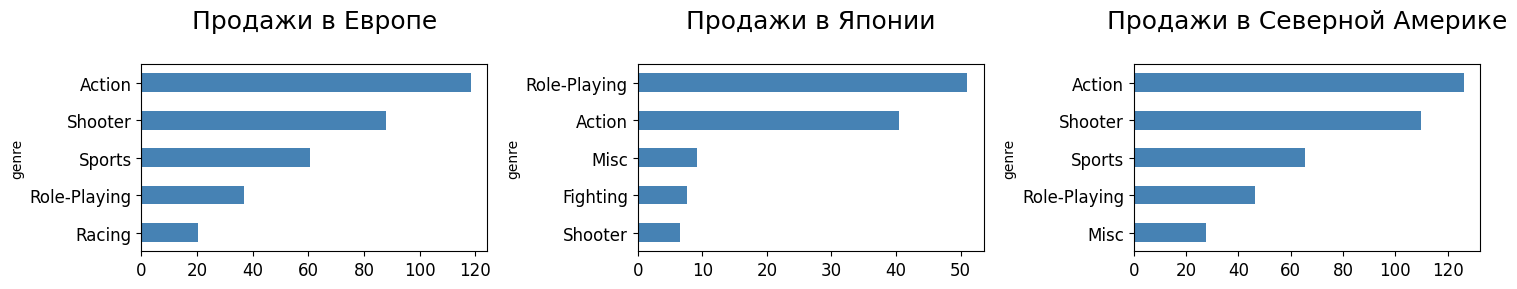

In [170]:
fig = plt.figure(figsize=(30, 10))

for place in ['eu_sales', 'jp_sales', 'na_sales']:
    
    if 'eu' in place:
        fig.add_subplot(131)
        pl_barh(actual, 'genre', 'Продажи в Европе', agg='sum', values=place, top=True, figsize=(15, 3))
    elif 'jp' in place:
        fig.add_subplot(132)
        pl_barh(actual, 'genre', 'Продажи в Японии', agg='sum', values=place, top=True, figsize=(15, 3))
    else:
        fig.add_subplot(133)
        pl_barh(actual, 'genre', 'Продажи в Северной Америке', agg='sum', values=place, top=True, figsize=(15, 3))
        
    fig.tight_layout()

В Европе, как и в Северной Америке лидер - Action, в Японии же - Role-Playing. В Японии выделяются именно два жанра: Role-Playing и Action, остальные жанры дают выручку в 3-4 раза меньше. В Европе и Северной Америке распределение по жанрам более плавное.

### Влияние рейтинга ESRB

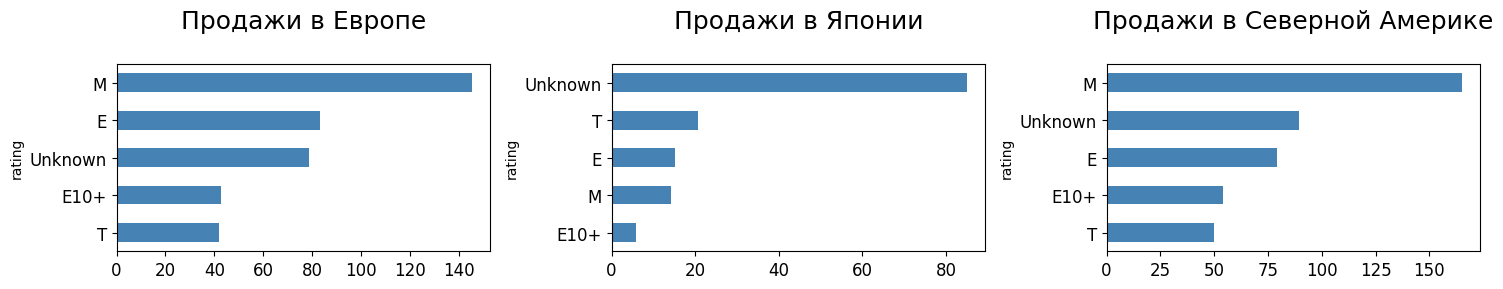

In [173]:
fig = plt.figure(figsize=(30, 10))
actual.loc[(actual['rating'] == -1), 'rating'] = 'Unknown'

for place in ['eu_sales', 'jp_sales', 'na_sales']:
    
    if 'eu' in place:
        fig.add_subplot(131)
        pl_barh(actual, 'rating', 'Продажи в Европе', 
                agg='sum', values=place, figsize=(15, 3))
    elif 'jp' in place:
        fig.add_subplot(132)
        pl_barh(actual, 'rating', 'Продажи в Японии', 
                agg='sum', values=place, figsize=(15, 3))
    else:
        fig.add_subplot(133)
        pl_barh(actual, 'rating', 'Продажи в Северной Америке', 
                agg='sum', values=place, figsize=(15, 3))
        
    fig.tight_layout()

В Европе, как и в Северной Америке, самую большую выручку приносят игры с рейтингом М, т.е. для лиц, старше 17-ти лет. В Японии эта категория только на 4-м месте. В Японии на первом месте игры, для которых категория не указана. В Европе и Северной Америке эта категория на третьем и втором месте соответственно. Это связано с тем, что рейтинг ESRB предназначен для игр, выпущенных в США. Игры, которые были выпущены локально в Японии, этот рейтинг не проходят.

In [101]:
# посмотрим, насколько сильно влияет рейтинг в разных регионах, учитывая не все продажи, а продажи на игру,
# чтобы различие в количестве игр разного жанра не искажало картину

def refer(actual, figsize=(15, 3)):
    
    fig = plt.figure(figsize=figsize)
    i = 1
    
    for place in ['eu_sales', 'jp_sales', 'na_sales']:
        actual_pivot = (
            actual[actual['rating'] != -1]
            .pivot_table(index='rating', values=place, aggfunc=['sum', 'count'])
        )
        actual_pivot.columns = ['sum', 'count']
        
        actual_pivot['conv'] = actual_pivot['sum'] / actual_pivot['count']
        actual_pivot.sort_values(by='conv', ascending=False, inplace=True)
        
        fig.add_subplot(1, 3, i)
        
        sns.heatmap(
            actual_pivot[['conv']], 
            cmap="Blues", annot=True, cbar=False, annot_kws={'size':15}, 
            vmin=0, 
            vmax=1
        );
        plt.title(place + '\n', fontsize = 18, color = 'Black')
        i += 1

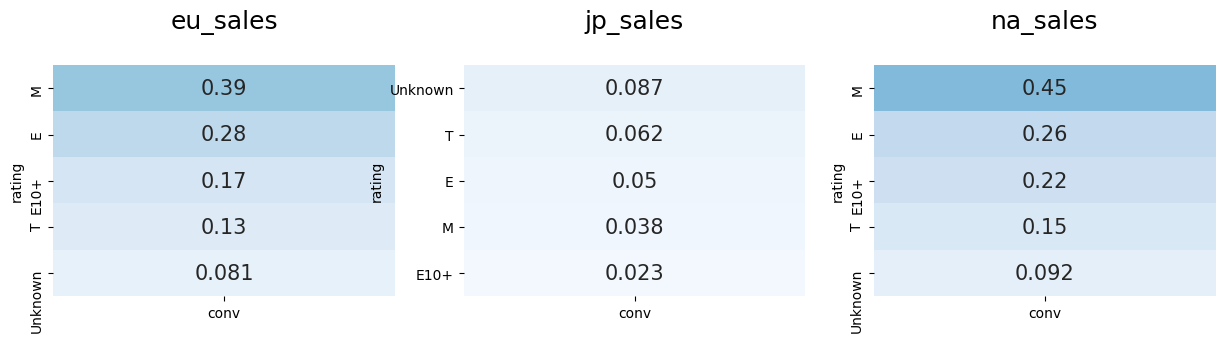

In [102]:
refer(actual)

Для Японии результат не изменился: большую среднюю цену дают игры с неизвестным рейтингом, но теперь видно, что в целом рейтинги между собой не сильно отличаются, т.е. в Японии рейтинг слабо определяет продажи.

Результат Северной Америки изменился: рейтинг Т (подросткам) вырос с 5-й позиции на 4-ю, а игры неизвестного рейтинга - со 2-й позиции на последнюю. Кроме того, можно заметить, что в целом выручка не особо зависит от рейтинга, за исключением рейтинга "для взрослых": наличие этого рейтинга увеличивает возможную выручку в среднем примерно в два раза.

В Европе зависимость от рейтинга присутствует более явная. Так же, как и в Северной Америке, большую выручку несут игры "для взрослых". 

## Проверка гипотез

### Сравнение среднего рейтинга платформ Xbox One и PC

**Гипотеза Н0:** Средние рейтинги платформ Xbox One и PC одинаковые.
    
**Гипотеза Н1:** Средние рейтинги платформ Xbox One и PC отличаются.

In [103]:
platform = ['XOne', 'PC']
results = st.ttest_ind(
    actual.query('platform == @platform[0] and user_score != -1')['critic_score'], 
    actual.query('platform == @platform[1] and user_score != -1')['critic_score']
)
alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.02304650736325144
Отвергаем нулевую гипотезу


In [104]:
platform = ['XOne', 'PC']
results = st.ttest_ind(
    actual.query('platform == @platform[0] and user_score != -1')['user_score'], 
    actual.query('platform == @platform[1] and user_score != -1')['user_score']
)
alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.16390354211387628
Не получилось отвергнуть нулевую гипотезу


Принимаем нулевую гипотезу: средние рейтинги как от критиков, так и от пользователей для платформ Xbox One и PC одинаковы.

### Сравнение средних пользовательских рейтингов жанров Action и Sports

**Гипотеза Н0:** Средние пользовательские рейтинги жанров Action и Sports одинаковые.
    
**Гипотеза Н1:** Средние пользовательские рейтинги жанров Action и Sports разные.

In [105]:
genre = ['Action', 'Sports']
results = st.ttest_ind(
    actual.query('genre == @genre[0] and user_score != -1')['user_score'], 
    actual.query('genre == @genre[1] and user_score != -1')['user_score']
)
alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

7.6896368430754285e-28
Отвергаем нулевую гипотезу


Принимаем альтернативную гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

***Общие наблюдения:***
* характерный срок появления новых и исчезновения старых платформ - **6-10 лет**;
* *актуальный период для изучения должен выбираться длиною <b>в 3-4 года</b>*, чтобы получить информацию как о последних интересах аудитории по жанрам игр, так и о том, какие игровые платформы должны быть актуальны к следующему году;
* *PC необходимо рассматривать **отдельно** от остальных платформ* и следить за циклами популярности игр для этой платформы.

***Актуальные данные:***

*Общее:*
* РС платформа на стадии спада;
* на актуальный период времени самыми доходными (без учёта выбросов) являются X360, PS4, XOne, Wii: максимальные продажи находятся выше 1,5 млн;
* самыми популярными на конец 2016-го года являются платформы **PS4**, **3DS** и **XOne**;
* на 2017-й год необходимо также рассматривать платформы PS3, WiiU, PC, PCV;
* оценки пользователей в целом не влияют на продажи, исключения - платформы WiiU и 3DS: для них влияния оценки критиков и пользователей одинаковы;
* чем выше оценка критиков, тем больше максимальные продажи, но хорошая оценка не гарантирует высоких продаж, однако и эта зависимость выражена слабо.

*О жанрах:*
* **больше всего на рынке** игр жанра **Action** (более, чем в 2 раза количество превышает количество игр любого другого жанра);
* в среднем **большую выручку** приносят жанры **Shooter**, **Sports**, **Platform**.

*О пользователях:*
* пользователь **Европы** больше всего предпочитает **PS4**, в топ-3 также входят PS3, XOne;
* абсолютный лидер платформ в **Японии** - **3DS**: продажи игр на остальные платформы ниже более, чем на 60%;
* в **Северной Америке** с небольшими различиями лидируют **PS4**, **XOne**, **X360**;
* в Европе и Северной Америке лидирует жанр Action, в Японии с небольшим преимуществом - жанр Role-Playing;
* **в Японии рейтинг ESRB не влияет** на выручку, приходящую от игр;
* в Северной Америке если игра обладает рейтингом М, то она потенциально даст большую выручку, при этом разницы для остальных рейтингов нет;
* **в Европе существует зависимость между рейтингом ESRB** и выручкой от игры, лидирующую позицию занимают игры рейтинга М.